# Population Comparison

This is a notebook going through population comparison of the ExoComp table of chemical equilibrium retrieval results. This shows the calculations contained in the Section 3 of the paper "The Library of Exoplanet Atmospheric Composition Measurements: Population Level Trends in Exoplanet Composition with ExoComp".

In [1]:
from exocomp import Abund
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Suppress slice copy warning
pd.options.mode.chained_assignment = None  # default='warn'

cs = ['#1f77b4', '#ff7f0e', '#d62728','#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

os.makedirs('./paper_figs/', exist_ok=True)

In [2]:
# Read in various datasets used throughout

#data = pd.read_csv('Exoplanet_Atmo_Measurements.csv',comment='#')
#data = pd.read_csv('Exoplanet_Atmo_Measurements_8_13_25.csv',comment='#')
data = pd.read_csv('Exoplanet_Atmo_Measurements_8_24_25.csv',comment='#')

stars = pd.read_csv('hypatia-26072025.csv')
bds = pd.read_csv('zalesky_22_BDs.txt') #only M/H and C/O verified after transcription!!

uhj_list = ['WASP-18 b','WASP-121 b','WASP-76 b', 'WASP-178 b','MASCARA-1 b','WASP-189 b','WASP-33 b','KELT-20 b']

In [3]:
# Convert to O/H, C/H, and Ref/H to standardize solar

data['O/H'] = 0.0
data['C/H'] = 0.0
data['Fe/H'] = 0.0
data['O/H Upper'] = 0.0
data['C/H Upper'] = 0.0
data['Fe/H Upper'] = 0.0
data['O/H Lower'] = 0.0
data['C/H Lower'] = 0.0
data['Fe/H Lower'] = 0.0
droplist = [0] # In case we want to neglect a data point. Here, we drop WASP-39b.
for i in range(1,len(data)):
    if data['Retrieval Type'].iloc[i] in ['ForMoSA']: # Not including grid-search techniques right now
        droplist.append(i)
        continue
    g = Abund(retrieval = data['Retrieval Type'].iloc[i])
    if data['Metallicity Type'].iloc[i] == 'O/H':
        g.mh_type = 'O/H'
        g.co_type = 'C/H'
    elif data['Metallicity Type'].iloc[i] == 'C/H':
        g.mh_type = 'C/H'
        g.co_type = 'O/H'
    else:
        g.mh_type = '(O+C)/H'
        g.co_type = 'MH_Preserve'

    # Use exocomp to convert from metallicity and C/O to O/H and C/H
    bulk,bulk_err = g.convert_bulk_abundance(data['Metallicity'].iloc[i],data['C/O'].iloc[i],
                                            mh_err = [data['Metallicity Lower'].iloc[i],data['Metallicity Upper'].iloc[i]],
                                            co_err = [data['C/O Lower'].iloc[i],data['C/O Upper'].iloc[i]],)
    data['O/H'].iloc[i] = bulk['O']
    data['C/H'].iloc[i]  = bulk['C']
    data['Fe/H'].iloc[i]  = bulk['Fe']
    data['O/H Upper'].iloc[i] = bulk_err['O'][1]
    data['C/H Upper'].iloc[i]  = bulk_err['C'][1]
    data['Fe/H Upper'].iloc[i]  = bulk_err['Fe'][1]
    data['O/H Lower'].iloc[i] = bulk_err['O'][0]
    data['C/H Lower'].iloc[i]  = bulk_err['C'][0]
    data['Fe/H Lower'].iloc[i]  = bulk_err['Fe'][0]

# Drop entries in the droplist
for i in droplist:
    data = data.drop(i)
data.reset_index()

Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Lodders10 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Lodd

/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/3084509787.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['O/H'].iloc[i] = bulk['O']
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/3084509787.py:33:

,index,Planet,Reference,Status,Geometry,Obs,C/O,C/O Lower,C/O Upper,Metallicity,...,Stellar Mass Upper,O/H,C/H,Fe/H,O/H Upper,C/H Upper,Fe/H Upper,O/H Lower,C/H Lower,Fe/H Lower
0,1,WASP-96 b,Wang et al. 2025,In Prep,Transit,NIRISS/SOSS+VLT/FORS2+WFC3/G141,0.57,0.12,0.07,0.010000,...,0.09,8.684125,8.440000,7.510000,0.465296,0.460000,0.460000,0.533667,0.520000,0.520000
1,2,WASP-178 b,Lothringer et al. 2025,Published,Transit,WFC3/G280+WFC3/G102+WFC3/G141+NIRSpec/G395H,0.01,0.01,0.01,1.470000,...,0.11,10.160000,8.160000,8.970000,0.280000,0.280179,0.280000,1.100000,1.100045,1.100000
2,3,HD 189733 b,Fu et al. 2024,Published,Transit,NIRCAM/F322W2+NIRCam/F444W,0.20,0.20,0.00,0.602060,...,0.08,9.403082,8.704112,8.102060,0.096910,0.096910,0.096910,0.124939,0.124939,0.124939
3,4,HD 209458 b,Xue et al. 2024,Published,Transit,NIRCAM/F322W2+NIRCam/F444W,0.08,0.05,0.09,0.477121,...,0.09,10.004031,8.907121,7.977121,0.378823,0.367977,0.367977,0.183052,0.176091,0.176091
4,5,HD 149026 b,Bean et al. 2023,Published,Eclipse,NIRCAM/F322W2+NIRCam/F444W,0.84,0.03,0.03,2.090000,...,0.33,10.780000,10.704279,9.590000,0.320000,0.321403,0.320000,0.350000,0.351283,0.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,62,WASP-43 b,Lesjak et al. 2023,Published,Eclipse,VLT/CRIRES+,0.78,0.09,0.09,0.200000,...,0.05,8.737905,8.630000,7.700000,0.114018,0.070000,0.070000,0.108167,0.060000,0.060000
61,63,WASP-77 A b,Smith et al. 2024,Published,Eclipse,NIRSpec/G395H+Gemini/IGRINS,0.57,0.06,0.06,-0.610000,...,0.07,8.064125,7.820000,6.890000,0.116619,0.100000,0.100000,0.108167,0.090000,0.090000
62,64,WASP-94A b,Ahrer et al. 2025,Published,Transit,NIRSpec/G395H,0.49,0.13,0.08,0.340000,...,-99.00,9.047017,8.737213,7.840000,0.120000,0.120000,0.120000,0.160000,0.160000,0.160000
63,65,WASP-189 b,Lesjak et al. 2025,Published,Eclipse,VLT/CRIRES+,0.32,0.14,0.41,1.400000,...,0.07,10.090000,9.595150,8.900000,1.390000,1.449207,1.390000,0.600000,0.616117,0.600000


In [4]:
# Define some functions for combining multiple entries for the same planet
# Should spin this off into a .py file, but useful to look at in here

def weighted_avg_and_se(df, val_col, err_low_col, err_up_col):
    # Use the maximum of the lower and upper errors as the weight
    weights = 1 / np.maximum(df[err_low_col], df[err_up_col])**2
    avg = np.average(df[val_col], weights=weights)
    se = np.sqrt(1 / weights.sum())
    return avg, se


def process_group(group):
    if len(group) == 1:
        return group  # no duplicates, keep as is

    row = group.iloc[0].copy()
    
    # C/O
    row['C/O'], co_se = weighted_avg_and_se(group, 'C/O', 'C/O Lower', 'C/O Upper')
    row['C/O Lower'] = co_se
    row['C/O Upper'] = co_se

    # Metallicity
    row['Metallicity'], met_se = weighted_avg_and_se(group, 'Metallicity', 'Metallicity Lower', 'Metallicity Upper')
    row['Metallicity Lower'] = met_se
    row['Metallicity Upper'] = met_se

    #O/H
    row['O/H'], oh_se = weighted_avg_and_se(group, 'O/H', 'O/H Lower', 'O/H Upper')
    row['O/H Lower'] = oh_se
    row['O/H Upper'] = oh_se
    
    #C/H
    row['C/H'], ch_se = weighted_avg_and_se(group, 'C/H', 'C/H Lower', 'C/H Upper')
    row['C/H Lower'] = ch_se
    row['C/H Upper'] = ch_se
    
    #Fe/H
    row['Fe/H'], feh_se = weighted_avg_and_se(group, 'Fe/H', 'Fe/H Lower', 'Fe/H Upper')
    row['Fe/H Lower'] = feh_se
    row['Fe/H Upper'] = feh_se
    
    return pd.DataFrame([row])
    
grouped = data.groupby(['Planet', 'Geometry'], group_keys=False)
result = grouped.apply(process_group).reset_index(drop=True)
result

/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/2177664126.py:46: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(process_group).reset_index(drop=True)


,Planet,Reference,Status,Geometry,Obs,C/O,C/O Lower,C/O Upper,Metallicity,Metallicity Lower,...,Stellar Mass Upper,O/H,C/H,Fe/H,O/H Upper,C/H Upper,Fe/H Upper,O/H Lower,C/H Lower,Fe/H Lower
0,2M0122 b,Xuan et al. 2024,Published,Direct,Keck/KPIC,0.370000,0.080000,0.080000,-0.300000,0.220000,...,-99.000,8.561798,8.130000,7.200000,0.170000,0.150000,0.150000,0.234094,0.220000,0.220000
1,51 Eri b,Brown-Sevilla et al. 2023,Published,Direct,VLT/SPHERE,0.380000,0.090000,0.090000,0.260000,0.300000,...,0.050,9.110216,8.690000,7.760000,0.313209,0.300000,0.300000,0.313209,0.300000,0.300000
2,AB Pic b,Gandhi et al. 2025,Published,Direct,VLT/CRIRES+,0.590000,0.010000,0.010000,0.540000,0.080000,...,0.100,9.230000,9.000852,8.000000,0.080000,0.080623,0.080000,0.080000,0.080623,0.080000
3,AF Lep b,Zhang et al. 2023,Published,Direct,VLT/SPHERE,0.611475,0.076822,0.076822,1.268293,0.156174,...,0.060,9.865419,9.698293,8.768293,0.176294,0.156174,0.156174,0.176294,0.156174,0.156174
4,DH Tau b,Xuan et al. 2024,Published,Direct,Keck/KPIC,0.540000,0.050000,0.060000,-0.300000,0.200000,...,0.000,8.397606,8.130000,7.200000,0.161555,0.150000,0.150000,0.206155,0.200000,0.200000
5,GJ 3470 b,Beatty et al. 2024,Published,Transit,NIRCAM/F322W2+NIRCam/F444W,0.350000,0.100000,0.100000,2.100000,0.120000,...,0.050,10.849869,10.393937,9.600000,0.120000,0.120000,0.120000,0.120000,0.120000,0.120000
6,GQ Lup b,Xuan et al. 2024,Published,Direct,Keck/KPIC,0.540000,0.008944,0.008944,0.458875,0.134518,...,0.160,9.135558,8.888875,7.958875,0.134871,0.134518,0.134518,0.134871,0.134518,0.134518
7,GSC 6214-210 b,Xuan et al. 2024,Published,Direct,Keck/KPIC,0.700000,0.060000,0.070000,0.150000,0.300000,...,-99.000,8.734902,8.580000,7.650000,0.193132,0.180000,0.180000,0.305941,0.300000,0.300000
8,HAT-P-14 b,Liu et al. 2025,Published,Transit,NIRISS/SOSS+NIRSpec/G395H,0.410000,0.200000,0.240000,-0.080000,0.980000,...,0.045,8.737216,8.350000,7.420000,0.921792,0.890000,0.890000,1.000200,0.980000,0.980000
9,HD 149026 b,Bean et al. 2023,Published,Eclipse,NIRCAM/F322W2+NIRCam/F444W,0.837927,0.029817,0.029817,1.641682,0.253605,...,0.330,10.317433,10.211706,9.117933,0.253605,0.258269,0.253605,0.253605,0.258269,0.253605


In [5]:
# Define some subgroups by geometry
direct = result[result['Geometry'] == 'Direct']
emission = result[result['Geometry'] == 'Eclipse']
transit = result[result['Geometry'] == 'Transit']

# Split off UHJs so we can mark them as special
# Because they are :). 
# Also dissociation...
uhjs = result[result['Planet'].isin(uhj_list)]

In [6]:
print(f'Number of final entries: {len((data['Planet']))}')
print(f'Number of unique planets measured: {len(np.unique(data['Planet']))}')
# number after account for multiple entires per planet
# can be more than unique planets, because we can measure planets with different geometries and they'll count towards this
print(f'Number of planet measurements accounting for multiples: {len((result['Planet']))}')
print(f'Number of direct spectroscopy entries: {len((direct['Planet']))}')
print(f'Number of transit spectroscopy entries: {len((transit['Planet']))}')
print(f'Number of emission spectroscopy entries: {len((emission['Planet']))}')
print(f'Number of UHJ entries: {len((uhjs['Planet']))}')

Number of final entries: 65
Number of unique planets measured: 46
Number of planet measurements accounting for multiples: 48
Number of direct spectroscopy entries: 16
Number of transit spectroscopy entries: 14
Number of emission spectroscopy entries: 18
Number of UHJ entries: 8


In [7]:
# Make a generic plotting script for pop comparisons
# so that we can make aesthetic changes easier to all plots

def pop_plot(fig,ax,axis1,axis2,plot_direct = True,
            axis1_label = None, axis2_label = None):
    if axis1_label is None:
        axis1_label = axis1
    if axis2_label is None:
        axis2_label = axis2
    if plot_direct is True:
        ds = [direct, emission, transit]
        labels = ['Direct', 'Eclipse', 'Transmission','UHJ']
        markers = ['o', 's', 'd', '*']
        colors = ['#2E86AB', '#A23B72', '#F18F01', 'grey']
    else:
        ds = [emission, transit]
        labels = ['Eclipse', 'Transmission','UHJ']
        markers = ['s', 'd', '*']
        colors = ['#A23B72', '#F18F01', 'grey']
    
        
    for d, label, marker, color in zip(ds,labels,markers,colors):
        ax.errorbar(d[f'{axis1}'], d[f'{axis2}'],
                    xerr=[d[f'{axis1} Lower'], d[f'{axis1} Upper']],
                    yerr=[d[f'{axis2} Lower'], d[f'{axis2} Upper']],
                    fmt=marker, label=label, color=color,
                    markersize=7, capsize=2, alpha=1.0,
                    markeredgecolor='k',markeredgewidth=0.5)

    for _, row in uhjs.iterrows():
        color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
        ax.errorbar(row[f'{axis1}'], row[f'{axis2}'],
                    xerr=[[row[f'{axis1} Lower']], [row[f'{axis1} Upper']]],
                    yerr=[[row[f'{axis2} Lower']], [row[f'{axis2} Upper']]],
                    fmt='*', color=color_map[row['Geometry']], markersize=12,
                    markeredgecolor='k',markeredgewidth=0.5)
    
    ax.set_xlabel(f'{axis1_label}', fontsize=15)
    ax.set_ylabel(f'{axis2_label}', fontsize=15)
    ax.legend(frameon=True, fancybox=True, shadow=False,fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.minorticks_on()
    
    ax.tick_params(labelsize=12)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    plt.tight_layout()

## Metallicity & CO Plots

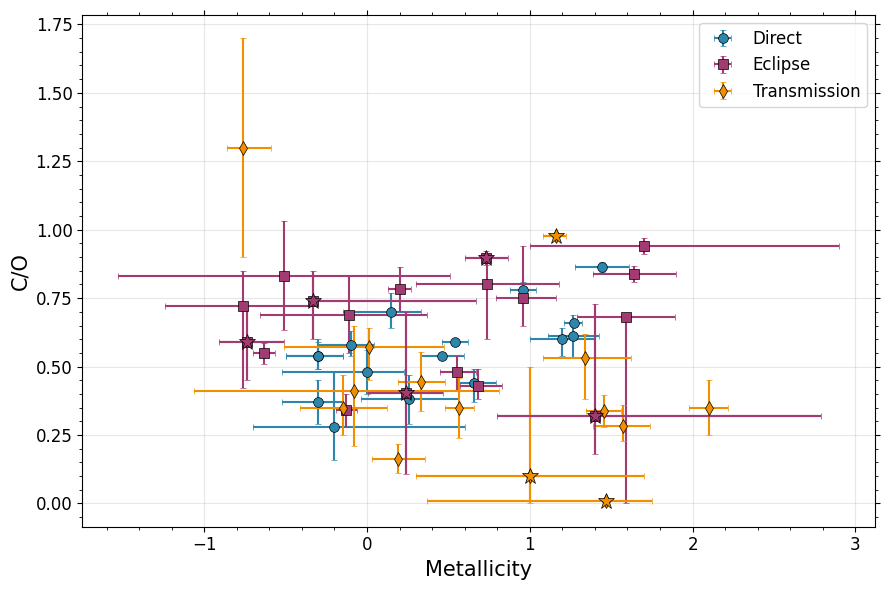

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
pop_plot(fig,ax,'Metallicity','C/O')

plt.savefig('./paper_figs/metallicity_co.pdf')

\multicolumn{7}{c}{\textbf{Direct Spectroscopy (16 planets)}} \\
        Average & $0.611 \pm 0.090$ & $0.824 \pm 0.496$ & $9.138 \pm 0.545$ & $8.870 \pm 0.610$ & $13.02 \pm 7.21$ & $100.5 \pm 1.9$ \\
        Median  & 0.560 & 0.359 & 9.123 & 8.789 & 11.85 & 100.0 \\
\multicolumn{7}{c}{\textbf{Direct 
 No HR 8799 Spectroscopy (14 planets)}} \\
        Average & $0.559 \pm 0.068$ & $0.417 \pm 0.450$ & $8.986 \pm 0.478$ & $8.693 \pm 0.516$ & $14.26 \pm 8.39$ & $100.0 \pm 0.0$ \\
        Median  & 0.540 & 0.205 & 8.879 & 8.635 & 13.25 & 100.0 \\
\multicolumn{7}{c}{\textbf{Eclipse Spectroscopy (18 planets)}} \\
        Average & $0.771 \pm 0.189$ & $0.055 \pm 0.558$ & $9.068 \pm 0.813$ & $8.866 \pm 0.827$ & $2.70 \pm 2.73$ & $1678.9 \pm 773.3$ \\
        Median  & 0.705 & 0.394 & 9.094 & 8.788 & 1.72 & 1686.5 \\
\multicolumn{7}{c}{\textbf{Eclipse 
 No UHJ Spectroscopy (19 planets)}} \\
        Average & $0.729 \pm 0.207$ & $0.020 \pm 0.553$ & $8.936 \pm 0.888$ & $8.745 \pm 0.936$ & $2.31 \

/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/1305005990.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=15)
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/1305005990.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,fontsize=15)


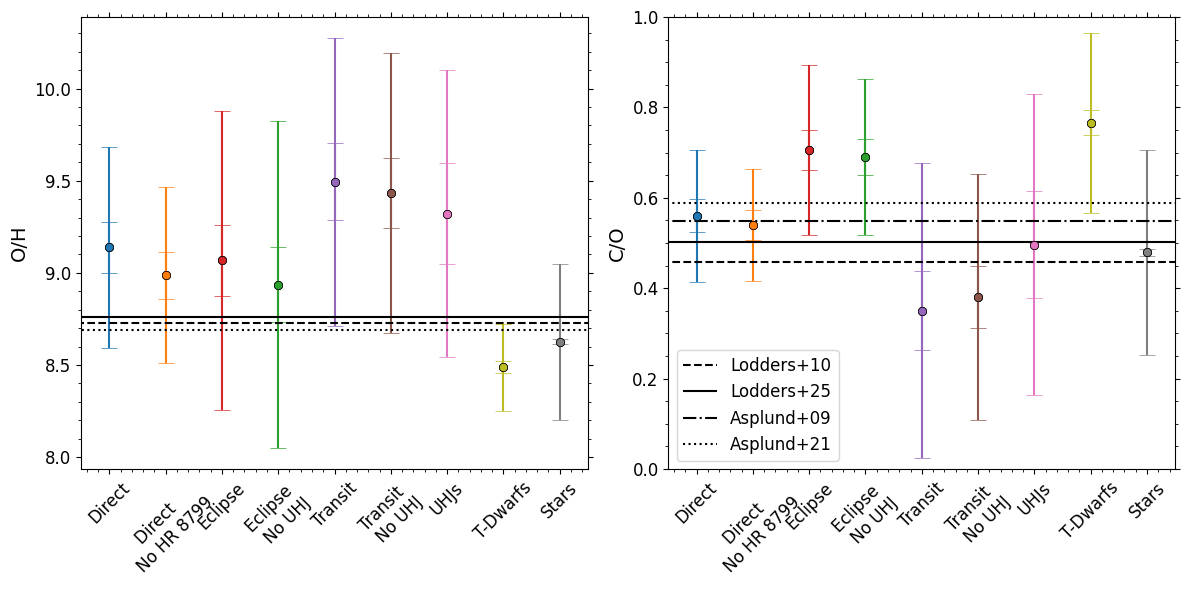

In [9]:
# Plot and print out some properties
do_stats = False
def analyze_and_plot_population(data, population_name, ax, print_stats=True, color='k', print_latex=True):
    """
    Analyze a population dataset and add error bar plots to existing axes.
    
    Parameters:
    -----------
    data : dict or DataFrame
        Dictionary/DataFrame containing the population data with keys:
        'C/O', 'C/O Lower', 'C/O Upper', 'Metallicity', 'Metallicity Lower', 
        'Metallicity Upper', 'Mass', 'T_eq', 'O/H', 'C/H'
    population_name : str
        Name of the population for labeling (e.g., 'Eclipse', 'Transit', 'UHJs')
    ax : array of matplotlib axes
        Array with at least 2 axes: ax[0] for O/H plot, ax[1] for C/O plot
    print_stats : bool, optional
        Whether to print statistics (default True)
    
    Returns:
    --------
    dict : Dictionary containing all calculated statistics
    """
    
    # Calculate weighted averages
    co_weights = 1/np.max([data['C/O Lower'], data['C/O Upper']], axis=0)**2
    mh_weights = 1/np.max([data['Metallicity Lower'], data['Metallicity Upper']], axis=0)**2
    
    avg_co = np.average(data['C/O'], weights=co_weights)
    avg_mh = np.average(data['Metallicity'], weights=mh_weights)
    avg_mass = np.average(data['Mass'])
    avg_temp = np.average(data['T_eq'])
    avg_oh = np.average(data['O/H'])
    avg_ch = np.average(data['C/H'])
    
    # Weighted standard deviations
    std_co = np.sqrt(np.average((data['C/O'] - avg_co)**2, weights=co_weights))
    std_mh = np.sqrt(np.average((data['Metallicity'] - avg_mh)**2, weights=mh_weights))
    
    # Unweighted standard deviations
    std_mass = np.std(data['Mass'])
    std_temp = np.std(data['T_eq'])
    std_oh = np.std(data['O/H'])
    std_ch = np.std(data['C/H'])
    
    # Calculate medians
    med_oh = np.median(data['O/H'])
    med_ch = np.median(data['C/H'])
    med_co = np.median(data['C/O'])
    med_mh = np.median(data['Metallicity'])
    med_mass = np.median(data['Mass'])
    med_temp = np.median(data['T_eq'])
    
    # Count number of planets
    n_planets = len(data)
    
    # Print statistics if requested
    if print_stats:
        print(f'{population_name} Spectroscopy ({n_planets} planets):')
        print(f'  Average C/O = {avg_co:.3f} ± {std_co:.3f}, Average M/H = {avg_mh:.3f} ± {std_mh:.3f}')
        print(f'  Average Mass = {avg_mass:.2f} ± {std_mass:.2f}, Average T_eq = {avg_temp:.1f} ± {std_temp:.1f}')
        print(f'  Average O/H = {avg_oh:.3f} ± {std_oh:.3f}, Average C/H = {avg_ch:.3f} ± {std_ch:.3f}')
        print(f'  Median C/O = {med_co:.3f}, Median M/H = {med_mh:.3f}')
        print(f'  Median Mass = {med_mass:.2f}, Median T_eq = {med_temp:.1f}')
        print(f'  Median O/H = {med_oh:.3f}, Median C/H = {med_ch:.3f}')

    if print_latex:
        latex_output = f"""\\multicolumn{{7}}{{c}}{{\\textbf{{{population_name} Spectroscopy ({n_planets} planets)}}}} \\\\
        Average & ${avg_co:.3f} \\pm {std_co:.3f}$ & ${avg_mh:.3f} \\pm {std_mh:.3f}$ & ${avg_oh:.3f} \\pm {std_oh:.3f}$ & ${avg_ch:.3f} \\pm {std_ch:.3f}$ & ${avg_mass:.2f} \\pm {std_mass:.2f}$ & ${avg_temp:.1f} \\pm {std_temp:.1f}$ \\\\
        Median  & {med_co:.3f} & {med_mh:.3f} & {med_oh:.3f} & {med_ch:.3f} & {med_mass:.2f} & {med_temp:.1f} \\\\"""
        print(latex_output)

    
    # Add error bar plots
    oh_err = np.std(data['O/H']) / np.sqrt(len(data['O/H']))
    co_err = np.std(data['C/O']) / np.sqrt(len(data['C/O']))
    
    ax[0].errorbar(population_name, avg_oh, yerr=oh_err, fmt='o',capsize=6,color=color,markeredgecolor='k',markeredgewidth=0.5)
    ax[1].errorbar(population_name, med_co, yerr=co_err, fmt='o',capsize=6,color=color,markeredgecolor='k',markeredgewidth=0.5)

    ax[0].errorbar(population_name, avg_oh, yerr=oh_err*np.sqrt(len(data['O/H'])), fmt='o',capsize=6,color=color,markeredgecolor='k',markeredgewidth=0.5)
    ax[1].errorbar(population_name, med_co, yerr=co_err*np.sqrt(len(data['C/O'])), fmt='o',capsize=6,color=color,markeredgecolor='k',markeredgewidth=0.5)
    
    # Return all statistics as a dictionary
    stats = {
        'avg_co': avg_co, 'avg_mh': avg_mh, 'avg_mass': avg_mass, 'avg_temp': avg_temp,
        'avg_oh': avg_oh, 'avg_ch': avg_ch, 'med_oh': med_oh, 'med_ch': med_ch,
        'med_co': med_co, 'med_mh': med_mh, 'med_mass': med_mass, 'med_temp': med_temp
    }
    
    return stats

fig,ax = plt.subplots(1,2,figsize=(12,6))

direct_stats = analyze_and_plot_population(direct, 'Direct', ax, print_stats=do_stats,color=cs[0])

# Remove HR 8799 planets to see how much that's changing things... not much actually
data_nohr8799 = data[~data['Planet'].isin(['HR 8799 b','HR 8799 c','HR 8799 d','HR 8799 e'])]
direct_nohr8799 = data_nohr8799[(data_nohr8799['Geometry'] == 'Direct')]
direct_nohr8799_stats = analyze_and_plot_population(direct_nohr8799, 'Direct \n No HR 8799', ax, print_stats=do_stats,color=cs[1])

emission_stats = analyze_and_plot_population(emission, 'Eclipse', ax, print_stats=do_stats,color=cs[2])

# Plot non-ultra hots by removing UHJ list
data_nouhj = data[~data['Planet'].isin(uhj_list)]
data_nouhj.reset_index()
emission_nouhj = data_nouhj[(data_nouhj['Geometry'] == 'Eclipse')]
emission_nouhj_stats = analyze_and_plot_population(emission_nouhj, 'Eclipse \n No UHJ', ax, print_stats=do_stats,color=cs[3])

transit_stats = analyze_and_plot_population(transit, 'Transit', ax, print_stats=do_stats,color=cs[4])
transit_nouhj = data_nouhj[(data_nouhj['Geometry'] == 'Transit')]
transit_nouhj_stats = analyze_and_plot_population(transit_nouhj, 'Transit \n No UHJ', ax, print_stats=do_stats,color=cs[5])

uhjs_stats = analyze_and_plot_population(uhjs, 'UHJs', ax, print_stats=do_stats,color=cs[6])

# Include T-dwarfs and Stars
ax[0].errorbar('T-Dwarfs',np.nanmean(bds['M_H'])+8.69,yerr = np.nanstd(bds['M_H'])/np.sqrt(len(bds['M_H'])),color=cs[8],capsize=6,fmt='o',
              markeredgecolor='k',markeredgewidth=0.5)
ax[0].errorbar('T-Dwarfs',np.nanmean(bds['M_H'])+8.69,yerr = np.nanstd(bds['M_H']),color=cs[8],capsize=6,fmt='o',
              markeredgecolor='k',markeredgewidth=0.5)

ax[0].errorbar('Stars',np.nanmean(stars['O'])+8.69,yerr = np.nanstd(stars['O'])/np.sqrt(len(stars['O'])),color=cs[7],capsize=6,fmt='o',
              markeredgecolor='k',markeredgewidth=0.5)
ax[0].errorbar('Stars',np.nanmean(stars['O'])+8.69,yerr = np.nanstd(stars['O']),color=cs[7],capsize=6,fmt='o',
              markeredgecolor='k',markeredgewidth=0.5)

ax[1].errorbar('T-Dwarfs',np.nanmean(bds['C_O']),yerr = np.nanstd(bds['C_O'])/np.sqrt(len(bds['C_O'])),color=cs[8],capsize=6,fmt='o',
              markeredgecolor='k',markeredgewidth=0.5)
ax[1].errorbar('T-Dwarfs',np.nanmean(bds['C_O']),yerr = np.nanstd(bds['C_O']),color=cs[8],capsize=6,fmt='o',
              markeredgecolor='k',markeredgewidth=0.5)

# Now include C/O of stars from Hypatia
# We need to convert C and O relative to solar to absolute
aspund09_co = 10**8.43/10**8.69
ax[1].errorbar('Stars',np.nanmean(10**stars['C']/10**stars['O'])*aspund09_co,
               yerr = np.nanstd(aspund09_co*10**stars['C']/10**stars['O'])/np.sqrt(len(stars['O'])),
               color=cs[7],capsize=6,fmt='o',markeredgecolor='k',markeredgewidth=0.5)

ax[1].errorbar('Stars',np.nanmean(10**stars['C']/10**stars['O'])*aspund09_co,
               yerr = np.nanstd(aspund09_co*10**stars['C']/10**stars['O']),
               color=cs[7],capsize=6,fmt='o',markeredgecolor='k',markeredgewidth=0.5)

# Plot range of solar values
ax[0].hlines(8.73,-2,10,'k',linestyle='--',label='Lodders+10')
ax[0].hlines(8.76,-2,10,'k',linestyle='-',label='Lodders+25')
ax[0].hlines(8.69,-2,10,'k',linestyle=':',label='Asplund+09/21')

ax[1].hlines(10**8.39/10**8.73,-2,10,'k',linestyle='--',label='Lodders+10')
ax[1].hlines(10**8.46/10**8.76,-2,10,'k',linestyle='-',label='Lodders+25')
ax[1].hlines(10**8.43/10**8.69,-2,10,'k',linestyle='-.',label='Asplund+09')
ax[1].hlines(10**8.46/10**8.69,-2,10,'k',linestyle=':',label='Asplund+21')

# Formatting
ax[0].set_ylabel('O/H',fontsize=14)
ax[1].set_ylabel('C/O',fontsize=14)

ax[1].legend(frameon=True,loc='lower left',fontsize=12)


ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,fontsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,fontsize=15)

ax[0].set_xlim(-0.5,8.5)

ax[1].set_ylim(0.0,1.0)
ax[1].set_xlim(-0.5,8.5)

ax[0].tick_params(labelsize=12)
ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].tick_params(labelsize=12)
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')
ax[0].minorticks_on()
ax[1].minorticks_on()


plt.tight_layout()

plt.savefig('./paper_figs/metallicity_co_geometry.pdf')

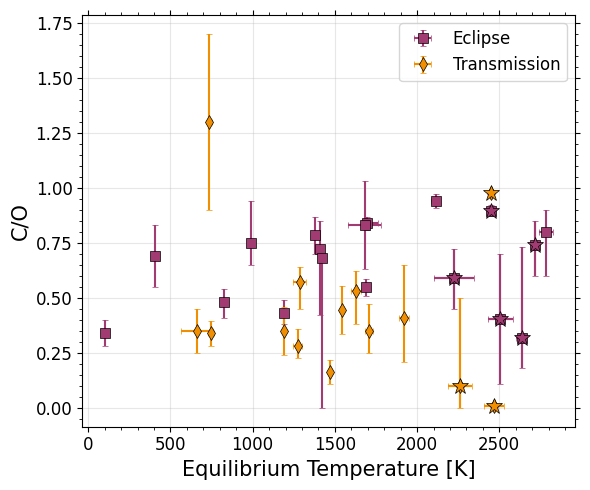

In [10]:
# C/O temp
# If low transiting C/O is methane depletion...
fig, ax = plt.subplots(figsize=(6, 5))

pop_plot(fig,ax,'T_eq','C/O',plot_direct=False,
        axis1_label='Equilibrium Temperature [K]')

plt.savefig('./paper_figs/temp_co.pdf')

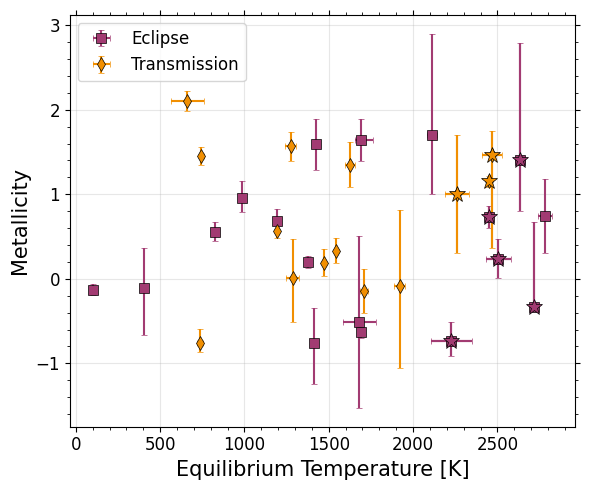

In [11]:
# Metallicity temp
# If low transiting C/O is methane depletion...
fig, ax = plt.subplots(figsize=(6.0, 5))

pop_plot(fig,ax,'T_eq','Metallicity',plot_direct=False,
        axis1_label='Equilibrium Temperature [K]')

plt.savefig('./paper_figs/temp_met.pdf')

## Metallicity & CO Statistical Tests
### Correlations

In [12]:
# Define weighted correlation tests
from scipy import stats
def weighted_correlation(x, y, sigma_x, sigma_y, verbose=False):
    """Calculate weighted Pearson correlation coefficient with uncertainties in both x and y"""
    # Combined weights from both uncertainties
    weights = 1 / (sigma_x**2 + sigma_y**2)
    # Weighted means
    x_mean = np.average(x, weights=weights)
    y_mean = np.average(y, weights=weights)
    
    # Weighted covariance and variances
    cov = np.average((x - x_mean) * (y - y_mean), weights=weights)
    var_x = np.average((x - x_mean)**2, weights=weights)
    var_y = np.average((y - y_mean)**2, weights=weights)
    
    # Correlation coefficient
    cc = cov / np.sqrt(var_x * var_y)
    if verbose:
        print(cc)
    return cc

def wrap_weighted_correlation(d,v1='Metallicity',v2='C/O'):
    wc = weighted_correlation(d[v1],d[v2],
                     np.max([d[f'{v1} Lower'].values,d[f'{v1} Upper'].values],axis=0),
                     np.max([d[f'{v2} Lower'].values,d[f'{v2} Upper'].values],axis=0))
    return wc

In [13]:
# Metallicity versus C/O
print('Pearson CC Metallicity versus C/O: data, direct, emission, transit:')
display(stats.pearsonr(data['Metallicity'],data['C/O']))
display(stats.pearsonr(direct['Metallicity'],direct['C/O']))
display(stats.pearsonr(emission['Metallicity'],emission['C/O']))
display(stats.pearsonr(transit['Metallicity'],transit['C/O']))
print('--')
print('Weighted CC Metallicity versus C/O: data, direct, emission, transit:')
display(weighted_correlation(data['Metallicity'],data['C/O'],
                     np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0),
                     np.max([data['C/O Lower'].values,data['C/O Upper'].values],axis=0)))
display(weighted_correlation(direct['Metallicity'],direct['C/O'],
                     np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0),
                     np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0)))
display(weighted_correlation(emission['Metallicity'],emission['C/O'],
                     np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0),
                     np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0)))
display(weighted_correlation(transit['Metallicity'],transit['C/O'],
                     np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0),
                     np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0)))

Pearson CC Metallicity versus C/O: data, direct, emission, transit:


PearsonRResult(statistic=-0.025124178809533583, pvalue=0.8425297732797203)

PearsonRResult(statistic=0.6405768421023071, pvalue=0.007508049261887619)

PearsonRResult(statistic=0.15788130405273387, pvalue=0.5315186488444763)

PearsonRResult(statistic=-0.42845940290775614, pvalue=0.1263838540644368)

--
Weighted CC Metallicity versus C/O: data, direct, emission, transit:


0.2876226691019032

0.6229019517669526

0.40272794334351253

0.0412996917339336

In [334]:
# Teq versus C/O
print('Pearson CC Teq versus C/O: emission, transit:')
display(stats.pearsonr(emission['T_eq'],emission['C/O']))
display(stats.pearsonr(transit['T_eq'],transit['C/O']))
print('--')
print('Weighted CC Teq versus C/O: emission, transit:')
display(weighted_correlation(emission['T_eq'],emission['C/O'],
                     np.max([emission['T_eq Lower'].values,emission['T_eq Upper'].values],axis=0),
                     np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0)))
display(weighted_correlation(transit['T_eq'],transit['C/O'],
                     np.max([transit['T_eq Lower'].values,transit['T_eq Upper'].values],axis=0),
                     np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0)))

Pearson CC Teq versus C/O: emission, transit:


PearsonRResult(statistic=0.22142588789188122, pvalue=0.3772243393430056)

PearsonRResult(statistic=-0.24338087529387958, pvalue=0.40177130010061357)

--
Weighted CC Teq versus C/O: emission, transit:


0.9617756910640772

0.38971564097642725

In [335]:
# Teq versus Metallicity
print('Pearson CC Teq versus Metallicity: emission, transit:')
display(stats.pearsonr(emission['T_eq'],emission['Metallicity']))
display(stats.pearsonr(transit['T_eq'],transit['Metallicity']))
print('--')
print('Weighted CC Teq versus Metallicity: emission, transit:')
#wrap_weighted_correlation(data)
display(weighted_correlation(emission['T_eq'],emission['Metallicity'],
                     np.max([emission['T_eq Lower'].values,emission['T_eq Upper'].values],axis=0),
                     np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0)))
display(weighted_correlation(transit['T_eq'],transit['Metallicity'],
                     np.max([transit['T_eq Lower'].values,transit['T_eq Upper'].values],axis=0),
                     np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0)))

Pearson CC Teq versus Metallicity: emission, transit:


PearsonRResult(statistic=0.1359238133011699, pvalue=0.5907273651697496)

PearsonRResult(statistic=0.0526690310705417, pvalue=0.8580802830546512)

--
Weighted CC Teq versus Metallicity: emission, transit:


-0.1789406749779483

0.5193423583434131

### C/O KS Tests

In [336]:
from scipy.stats import distributions
from scipy.stats import kstest

def ks_weighted(data1, data2, wei1, wei2, alternative='two-sided'):
    ix1 = np.argsort(data1)
    ix2 = np.argsort(data2)
    data1 = data1[ix1]
    data2 = data2[ix2]
    wei1 = wei1[ix1]
    wei2 = wei2[ix2]
    data = np.concatenate([data1, data2])
    cwei1 = np.hstack([0, np.cumsum(wei1)/sum(wei1)])
    cwei2 = np.hstack([0, np.cumsum(wei2)/sum(wei2)])
    cdf1we = cwei1[np.searchsorted(data1, data, side='right')]
    cdf2we = cwei2[np.searchsorted(data2, data, side='right')]
    d = np.max(np.abs(cdf1we - cdf2we))
    # calculate p-value
    n1 = data1.shape[0]
    n2 = data2.shape[0]
    m, n = sorted([float(n1), float(n2)], reverse=True)
    en = m * n / (m + n)
    if alternative == 'two-sided':
        prob = distributions.kstwo.sf(d, np.round(en))
    else:
        z = np.sqrt(en) * d
        # Use Hodges' suggested approximation Eqn 5.3
        # Requires m to be the larger of (n1, n2)
        expt = -2 * z**2 - 2 * z * (m + 2*n)/np.sqrt(m*n*(m+n))/3.0
        prob = np.exp(expt)
    return d, prob

print('Test to show weighted and unweighted agree - use asymp p-val calc')
display(ks_weighted(transit['C/O'].values,direct['C/O'].values,
                    np.ones(len(transit)),np.ones(len(direct)))[1])
display(kstest(transit['C/O'],direct['C/O'],method='asymp')[1])

Test to show weighted and unweighted agree - use asymp p-val calc


0.03315635266511106

0.03315635266511106

In [337]:
# planets vs. stars
# Can only do unweighted b/c of stellar weights??
stars['C/O'] = (10**stars['C']/10**stars['O'])*aspund09_co
display(kstest(data['C/O'],stars['C/O'].dropna(),method='asymp'))

KstestResult(statistic=0.3170097508125677, pvalue=2.0549697098557988e-05, statistic_location=0.537031796370253, statistic_sign=-1)

In [338]:
#KS tests
print('---Unweighted---')
print('Transit versus Direct')
display(kstest(transit['C/O'],direct['C/O'],method='asymp'))
print('Emission versus Direct')
display(kstest(emission['C/O'],direct['C/O'],method='asymp'))
print('Transit versus Emission')
display(kstest(emission['C/O'],transit['C/O'],method='asymp'))
print('Transit (no UHJs) versus Direct')
display(kstest(transit_nouhj['C/O'],data['C/O'],method='asymp'))

print('---Weighted---')
print('Transit versus Direct')
display(ks_weighted(transit['C/O'].values,direct['C/O'].values,
                    1/(np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0))**2,
                    1/np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0)**2))
print('Emission versus Direct')
display(ks_weighted(emission['C/O'].values,direct['C/O'].values,
                    1/np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0)**2,
                    1/np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0)**2))
print('Transit versus Emission')
display(ks_weighted(transit['C/O'].values,emission['C/O'].values,
                    1/np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0)**2,
                    1/np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0)**2))
print('Transit (no UHJs) versus Direct')
display(ks_weighted(transit_nouhj['C/O'].values,direct['C/O'].values,
                    1/np.max([transit_nouhj['C/O Lower'].values,transit_nouhj['C/O Upper'].values],axis=0)**2,
                    1/np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0)**2))

---Unweighted---
Transit versus Direct


KstestResult(statistic=0.5089285714285714, pvalue=0.03315635266511106, statistic_location=0.35, statistic_sign=1)

Emission versus Direct


KstestResult(statistic=0.4236111111111111, pvalue=0.08117625333702128, statistic_location=0.66, statistic_sign=-1)

Transit versus Emission


KstestResult(statistic=0.5238095238095237, pvalue=0.01435236660068029, statistic_location=0.57, statistic_sign=-1)

Transit (no UHJs) versus Direct


KstestResult(statistic=0.42980769230769234, pvalue=0.010686313333543307, statistic_location=0.57, statistic_sign=1)

---Weighted---
Transit versus Direct


(0.7112378383819427, 0.0004308852629573933)

Emission versus Direct


(0.6368375143446094, 0.0011143868834261447)

Transit versus Emission


(0.7112378383819427, 0.0001327576194499554)

Transit (no UHJs) versus Direct


(0.8692161641350039, 1.7118376390774358e-07)

### Metallicity KS Tests

In [339]:
# planets vs. stars
# Can only do unweighted b/c of stellar weights??
display(kstest(data['Metallicity'],stars['Fe'].dropna()))

display(ks_weighted(data['Metallicity'].values,stars['Fe'].dropna().values,
                    1/np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)**2,
                    np.ones(len(stars['Fe'].dropna()))))

KstestResult(statistic=0.535, pvalue=8.833393234257428e-17, statistic_location=0.19, statistic_sign=-1)

(0.6669404901243061, 2.9721274613538862e-27)

In [340]:
#KS tests
from scipy.stats import kstest
print('---Unweighted---')
print('Transit versus Direct')
display(kstest(transit['Metallicity'],direct['Metallicity']))
print('Direct versus Eclipse')
display(kstest(emission['Metallicity'],direct['Metallicity']))
print('Transit versus Eclipse')
display(kstest(emission['Metallicity'],transit['Metallicity']))
print('Transit (nouhj) versus All')
display(kstest(transit_nouhj['Metallicity'],data['Metallicity']))
print('Transit versus All')
display(kstest(transit['Metallicity'],data['Metallicity']))
print('Eclipse versus All')
display(kstest(emission['Metallicity'],data['Metallicity']))
print('Eclipse (nouhj) versus All')
display(kstest(emission_nouhj['Metallicity'],data['Metallicity']))


print('---Weighted---')
print('Transit versus Direct')
display(ks_weighted(transit['Metallicity'].values,direct['Metallicity'].values,
                    1/np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0)**2))
print('Direct versus Eclipse')
display(ks_weighted(emission['Metallicity'].values,direct['Metallicity'].values,
                    1/np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0)**2))
print('Transit versus Eclipse')
display(ks_weighted(transit['Metallicity'].values,emission['Metallicity'].values,
                    1/np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0)**2))
print('Transit (nouhj) versus All')
display(ks_weighted(transit_nouhj['Metallicity'].values,data['Metallicity'].values,
                    1/np.max([transit_nouhj['Metallicity Lower'].values,transit_nouhj['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)**2))
print('Transit versus All')
display(ks_weighted(transit['Metallicity'].values,data['Metallicity'].values,
                    1/np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)**2))
print('Direct versus All')
display(ks_weighted(direct['Metallicity'].values,data['Metallicity'].values,
                    1/np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)**2))
print('Eclipse versus All')
display(ks_weighted(emission['Metallicity'].values,data['Metallicity'].values,
                    1/np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)**2))
print('Eclipse (nouhj) versus All')
display(ks_weighted(emission_nouhj['Metallicity'].values,data['Metallicity'].values,
                    1/np.max([emission_nouhj['Metallicity Lower'].values,emission_nouhj['Metallicity Upper'].values],axis=0)**2,
                    1/np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)**2))

---Unweighted---
Transit versus Direct


KstestResult(statistic=0.29464285714285715, pvalue=0.45594093218268755, statistic_location=1.27, statistic_sign=-1)

Direct versus Eclipse


KstestResult(statistic=0.2777777777777778, pvalue=0.4293158524103572, statistic_location=-0.33, statistic_sign=1)

Transit versus Eclipse


KstestResult(statistic=0.2777777777777778, pvalue=0.49062299071177484, statistic_location=0.96, statistic_sign=1)

Transit (nouhj) versus All


KstestResult(statistic=0.16826923076923078, pvalue=0.7881554364945278, statistic_location=-0.17, statistic_sign=-1)

Transit versus All


KstestResult(statistic=0.23846153846153847, pvalue=0.44990260582346037, statistic_location=0.96, statistic_sign=-1)

Eclipse versus All


KstestResult(statistic=0.13931623931623932, pvalue=0.9042531799252317, statistic_location=-0.33, statistic_sign=1)

Eclipse (nouhj) versus All


KstestResult(statistic=0.19676113360323888, pvalue=0.5434125165869939, statistic_location=-0.11, statistic_sign=1)

---Weighted---
Transit versus Direct


(0.3006114871896145, 0.46378618895245893)

Direct versus Eclipse


(0.6244463484156981, 0.0015305275714572895)

Transit versus Eclipse


(0.5977059478378917, 0.0029326173556820144)

Transit (nouhj) versus All


(0.2590999805171632, 0.293631016777507)

Transit versus All


(0.3013118253231622, 0.18359675257726282)

Direct versus All


(0.25288928785924636, 0.3204561447650708)

Eclipse versus All


(0.39247325427953206, 0.01871301916527257)

Eclipse (nouhj) versus All


(0.4343828515274857, 0.004324678140562588)

In [341]:
# 2D KS
import ndtest
P, D = ndtest.ks2d2s(transit['C/O'].values, transit['Metallicity'].values, 
                     emission['C/O'].values, emission['Metallicity'].values, extra=True)
print(P,D)
P, D = ndtest.ks2d2s(transit['C/O'].values, transit['Metallicity'].values, 
                     direct['C/O'].values, direct['Metallicity'].values, extra=True)
print(P,D)
P, D = ndtest.ks2d2s(direct['C/O'].values, direct['Metallicity'].values, 
                     emission['C/O'].values, emission['Metallicity'].values, extra=True)
print(P,D)

0.026286398258023324 0.5158730158730158
0.016961911113299 0.5535714285714286
0.03661093803968106 0.4826388888888889


### Mass-Composition Correlation Tests

In [342]:
print('Pearson CC Mass versus C/O: data, direct, emission, transit:')

print('---Unweighted---')
print('All')
display(stats.pearsonr(data['Mass'],data['C/O']))
print('Direct')
display(stats.pearsonr(direct['Mass'],direct['C/O']))
print('Eclipse')
display(stats.pearsonr(emission['Mass'],emission['C/O']))
print('Transit')
display(stats.pearsonr(transit['Mass'],transit['C/O']))


print('---Weighted Coefficients (not Pvalues)---')
print('All')
display(weighted_correlation(data['Mass'],data['C/O'],
                     np.ones(len(data['Mass'])),
                     np.max([data['C/O Lower'].values,data['C/O Upper'].values],axis=0)))
print('Direct')
display(weighted_correlation(direct['Mass'],direct['C/O'],
                     np.ones(len(direct['Mass'])),
                     np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0)))
print('Direct No HR8799')
display(weighted_correlation(direct_nohr8799['Mass'],direct_nohr8799['C/O'],
                     np.ones(len(direct_nohr8799['Mass'])),
                     np.max([direct_nohr8799['C/O Lower'].values,direct_nohr8799['C/O Upper'].values],axis=0)))
print('Eclipse')
display(weighted_correlation(emission['Mass'],emission['C/O'],
                     np.ones(len(emission['Mass'])),
                     np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0)))
print('Transit')
display(weighted_correlation(transit['Mass'],transit['C/O'],
                     np.ones(len(transit['Mass'])),
                     np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0)))

Pearson CC Mass versus C/O: data, direct, emission, transit:
---Unweighted---
All


PearsonRResult(statistic=0.021889520238383406, pvalue=0.8625921741551544)

Direct


PearsonRResult(statistic=0.017497217154245483, pvalue=0.9487187648127204)

Eclipse


PearsonRResult(statistic=-0.36134496657398274, pvalue=0.14066555265164665)

Transit


PearsonRResult(statistic=-0.08860408192888036, pvalue=0.7632549439201506)

---Weighted Coefficients (not Pvalues)---
All


0.026616152999522885

Direct


0.011180010818847534

Direct No HR8799


0.2716153613615166

Eclipse


-0.36560357403665866

Transit


-0.07955384949538348

In [343]:
print('Pearson CC Mass versus Metallicity: data, direct, emission, transit:')

print('---Unweighted---')
print('All')
display(stats.pearsonr(data['Mass'],data['Metallicity']))
print('Direct')
display(stats.pearsonr(direct['Mass'],direct['Metallicity']))
print('Eclipse')
display(stats.pearsonr(emission['Mass'],emission['Metallicity']))
print('Transit')
display(stats.pearsonr(transit['Mass'],transit['Metallicity']))


print('---Weighted Coefficients (not Pvalues)---')
print('All')
display(weighted_correlation(data['Mass'],data['Metallicity'],
                     np.ones(len(data['Mass'])),
                     np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0)))
print('Direct')
display(weighted_correlation(direct['Mass'],direct['Metallicity'],
                     np.ones(len(direct['Mass'])),
                     np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0)))
print('Direct No HR8799')
display(weighted_correlation(direct_nohr8799['Mass'],direct_nohr8799['Metallicity'],
                     np.ones(len(direct_nohr8799['Mass'])),
                     np.max([direct_nohr8799['Metallicity Lower'].values,direct_nohr8799['Metallicity Upper'].values],axis=0)))
print('Eclipse')
display(weighted_correlation(emission['Mass'],emission['Metallicity'],
                     np.ones(len(emission['Mass'])),
                     np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0)))
print('Transit')
display(weighted_correlation(transit['Mass'],transit['Metallicity'],
                     np.ones(len(transit['Mass'])),
                     np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0)))

Pearson CC Mass versus Metallicity: data, direct, emission, transit:
---Unweighted---
All


PearsonRResult(statistic=-0.1913538273332566, pvalue=0.1267714541540232)

Direct


PearsonRResult(statistic=-0.4352904938817366, pvalue=0.09195537151044374)

Eclipse


PearsonRResult(statistic=-0.4312259868546514, pvalue=0.07398157492531807)

Transit


PearsonRResult(statistic=-0.29938760412777965, pvalue=0.2984029967092591)

---Weighted Coefficients (not Pvalues)---
All


-0.179647724394113

Direct


-0.49159819788765846

Direct No HR8799


-0.42817930486335526

Eclipse


-0.39306106124107887

Transit


-0.27363930277068554

## C/O versus Mass

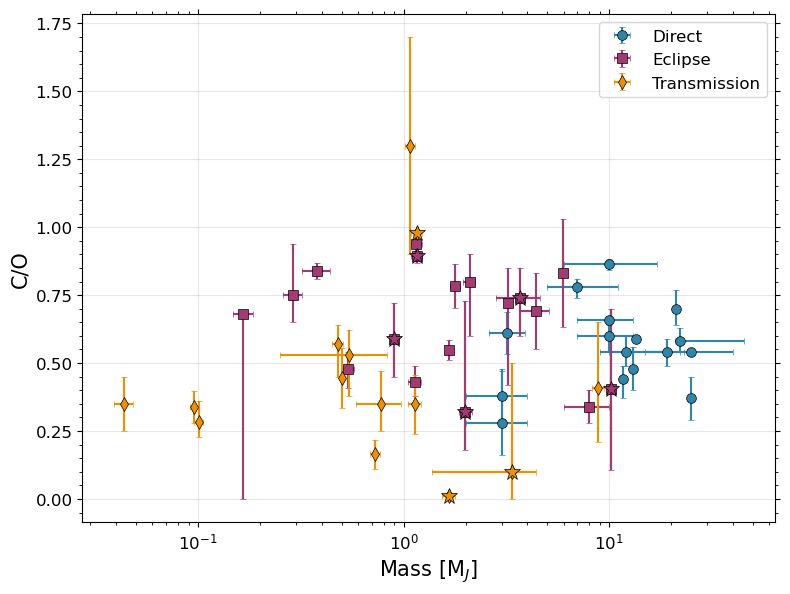

In [389]:
#fig, ax = plt.subplots(figsize=(9, 6))

# Mass C/O
# If low transiting C/O is methane depletion...
fig, ax = plt.subplots(figsize=(8, 6))

pop_plot(fig,ax,'Mass','C/O',plot_direct=True,
        axis1_label='Mass [M$_J$]')
plt.gca().set_xscale('log')
plt.savefig('./paper_figs/mass_co_geometry.pdf')

## Stellar Property vs. Metallicity Plots

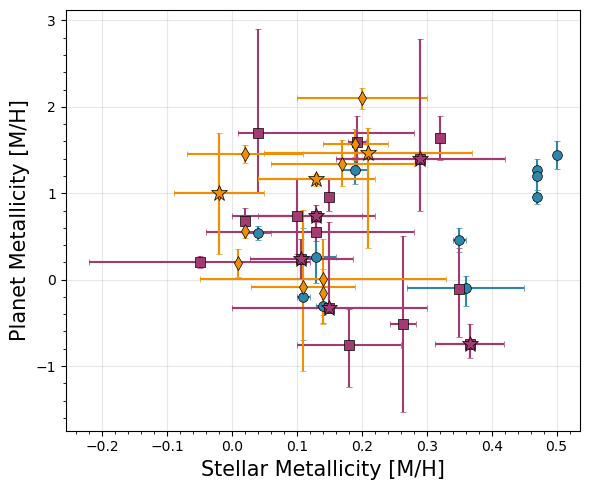

In [391]:
# Planet Metallcity vs. Stellar Metallicity
#Custom plotting this one b/c we want to filter bad measurements
fig, ax = plt.subplots(figsize=(6, 5))

for d, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    # If stellar metallicity is -99, that means it doesn't have a main sequence host!
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == -99)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == -99)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == 0.0)[0]] = np.nan
    #Same for mass
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == -99)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == -99)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == 0.0)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == 0.0)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == 0.0)[0]] = np.nan

    ax.errorbar(d['Stellar Metallicity'], d['Metallicity'],
                xerr=[d['Stellar Metallicity Lower'], d['Stellar Metallicity Upper']],
                yerr=[d['Metallicity Lower'], d['Metallicity Upper']],
                fmt=marker, label=label, color=color,
                markersize=7, capsize=2, alpha=1.0,
                markeredgecolor='k',markeredgewidth=0.5)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    if row['Stellar Metallicity'] == -99:
        continue
    if row['Stellar Metallicity'] == 0.0:
        continue
    ax.errorbar(row['Stellar Metallicity'], row['Metallicity'],
                xerr=[[row['Stellar Metallicity Lower']], [row['Stellar Metallicity Upper']]],
                yerr=[[row['Metallicity Lower']], [row['Metallicity Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12,
                markeredgecolor='k',markeredgewidth=0.5)

#ax.set_xscale('log')

ax.set_xlabel('Stellar Metallicity [M/H]', fontsize=15)
ax.set_ylabel('Planet Metallicity [M/H]', fontsize=15)
#ax.legend(frameon=True, fancybox=True, shadow=False,loc='upper left')
ax.grid(True, alpha=0.3)
ax.minorticks_on()
plt.tight_layout()

plt.savefig('./paper_figs/metallicity_metallicity.pdf')

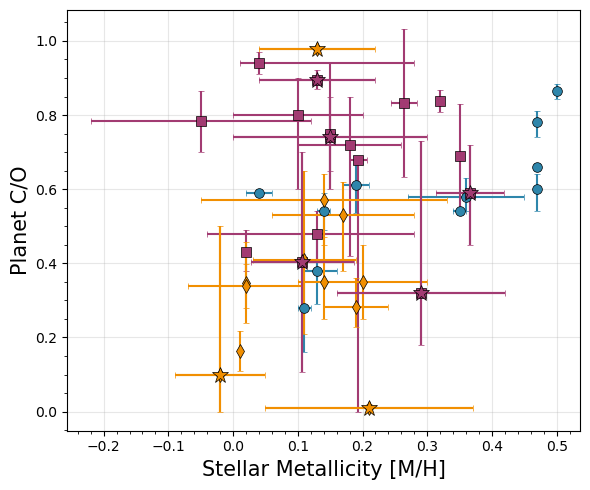

In [392]:
# Planet C/O vs. Stellar Metallicity
#Custom plotting this one b/c we want to filter bad measurements
fig, ax = plt.subplots(figsize=(6, 5))

for d, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    # If stellar metallicity is -99, that means it doesn't have a main sequence host!
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == -99)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == -99)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == 0.0)[0]] = np.nan
    #Same for mass
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == -99)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == -99)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == 0.0)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == 0.0)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == 0.0)[0]] = np.nan

    ax.errorbar(d['Stellar Metallicity'], d['C/O'],
                xerr=[d['Stellar Metallicity Lower'], d['Stellar Metallicity Upper']],
                yerr=[d['C/O Lower'], d['C/O Upper']],
                fmt=marker, label=label, color=color,
                markersize=7, capsize=2, alpha=1.0,
                markeredgecolor='k',markeredgewidth=0.5)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    if row['Stellar Metallicity'] == -99:
        continue
    if row['Stellar Metallicity'] == 0.0:
        continue
    ax.errorbar(row['Stellar Metallicity'], row['C/O'],
                xerr=[[row['Stellar Metallicity Lower']], [row['Stellar Metallicity Upper']]],
                yerr=[[row['C/O Lower']], [row['C/O Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12,
                markeredgecolor='k',markeredgewidth=0.5)

#ax.set_xscale('log')

ax.set_xlabel('Stellar Metallicity [M/H]', fontsize=15)
ax.set_ylabel('Planet C/O', fontsize=15)
#ax.legend(frameon=True, fancybox=True, shadow=False,loc='upper left')
ax.grid(True, alpha=0.3)
ax.minorticks_on()
plt.tight_layout()

plt.savefig('./paper_figs/co_stellarmetallicity.pdf')

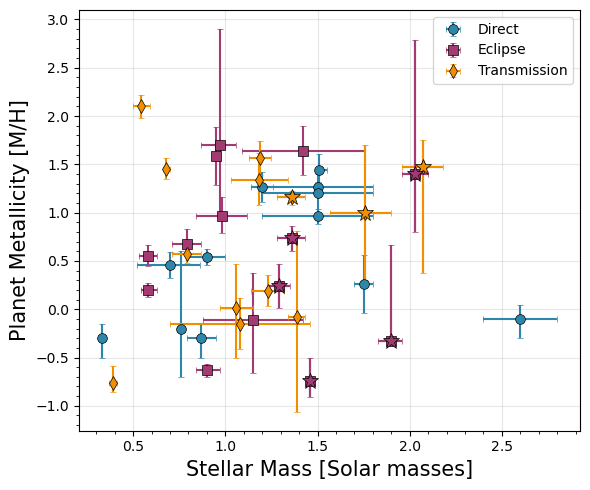

In [393]:
# Planet Metallicity vs. Stellar Mass
fig, ax = plt.subplots(figsize=(6, 5))

for d, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    # If stellar metallicity is -99, that means it doesn't have a main sequence host!
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == -99)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == -99)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == 0.0)[0]] = np.nan
    #Same for mass
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == -99)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == -99)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == 0.0)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == 0.0)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == 0.0)[0]] = np.nan

    ax.errorbar(d['Stellar Mass'], d['Metallicity'],
                xerr=[d['Stellar Mass Lower'], d['Stellar Mass Upper']],
                yerr=[d['Metallicity Lower'], d['Metallicity Upper']],
                fmt=marker, label=label, color=color,
                markersize=7, capsize=2, alpha=1.0,
                markeredgecolor='k',markeredgewidth=0.5)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    if row['Stellar Metallicity'] == -99:
        continue
    if row['Stellar Metallicity'] == 0.0:
        continue
    ax.errorbar(row['Stellar Mass'], row['Metallicity'],
                xerr=[[row['Stellar Mass Lower']], [row['Stellar Mass Upper']]],
                yerr=[[row['Metallicity Lower']], [row['Metallicity Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12,
                markeredgecolor='k',markeredgewidth=0.5)

#ax.set_xscale('log')

ax.set_xlabel('Stellar Mass [Solar masses]', fontsize=15)
ax.set_ylabel('Planet Metallicity [M/H]', fontsize=15)
ax.legend(frameon=True, fancybox=True, shadow=False,loc='upper right')
ax.grid(True, alpha=0.3)
ax.minorticks_on()
plt.tight_layout()

plt.savefig('./paper_figs/stellarmass_metallicity.pdf')

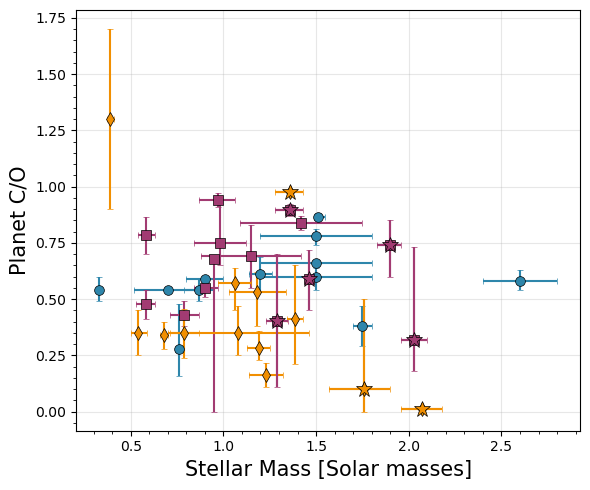

In [394]:
# Planet C/O vs. Stellar Mass
fig, ax = plt.subplots(figsize=(6, 5))

for d, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    # If stellar metallicity is -99, that means it doesn't have a main sequence host!
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == -99)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == -99)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Metallicity'].iloc[np.where(d['Stellar Metallicity'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Upper'].iloc[np.where(d['Stellar Metallicity Upper'] == 0.0)[0]] = np.nan
    d['Stellar Metallicity Lower'].iloc[np.where(d['Stellar Metallicity Lower'] == 0.0)[0]] = np.nan
    #Same for mass
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == -99)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == -99)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == -99)[0]] = np.nan
    # If stellar metallicity is exactly 0.0, that means we don't have a measurement and assume solar... let's ignore those
    d['Stellar Mass'].iloc[np.where(d['Stellar Mass'] == 0.0)[0]] = np.nan
    d['Stellar Mass Upper'].iloc[np.where(d['Stellar Mass Upper'] == 0.0)[0]] = np.nan
    d['Stellar Mass Lower'].iloc[np.where(d['Stellar Mass Lower'] == 0.0)[0]] = np.nan

    ax.errorbar(d['Stellar Mass'], d['C/O'],
                xerr=[d['Stellar Mass Lower'], d['Stellar Mass Upper']],
                yerr=[d['C/O Lower'], d['C/O Upper']],
                fmt=marker, label=label, color=color,
                markersize=7, capsize=2, alpha=1.0,
                markeredgecolor='k',markeredgewidth=0.5)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    if row['Stellar Metallicity'] == -99:
        continue
    if row['Stellar Metallicity'] == 0.0:
        continue
    ax.errorbar(row['Stellar Mass'], row['C/O'],
                xerr=[[row['Stellar Mass Lower']], [row['Stellar Mass Upper']]],
                yerr=[[row['C/O Lower']], [row['C/O Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12,
                markeredgecolor='k',markeredgewidth=0.5)

#ax.set_xscale('log')

ax.set_xlabel('Stellar Mass [Solar masses]', fontsize=15)
ax.set_ylabel('Planet C/O', fontsize=15)
#ax.legend(frameon=True, fancybox=True, shadow=False,loc='upper right')
ax.grid(True, alpha=0.3)
ax.minorticks_on()
plt.tight_layout()

plt.savefig('./paper_figs/stellarmass_co.pdf')

## Stellar Correlations
I'm not sure how to deal with the stellar metallicity and mass uncertainties because many are missing. Let's keep unweighted for now.
### Stellar metallicity versus Planet metallicity

In [349]:
from scipy import stats
display(stats.pearsonr(transit['Stellar Metallicity'].dropna(),transit.dropna(subset=['Stellar Metallicity'])['Metallicity']))
display(stats.pearsonr(emission['Stellar Metallicity'].dropna(),emission.dropna(subset=['Stellar Metallicity'])['Metallicity']))
display(stats.pearsonr(direct['Stellar Metallicity'].dropna(),direct.dropna(subset=['Stellar Metallicity'])['Metallicity']))
display(stats.pearsonr(data['Stellar Metallicity'].dropna(),data.dropna(subset=['Stellar Metallicity'])['Metallicity']))

PearsonRResult(statistic=0.33926948694869424, pvalue=0.2806529187404688)

PearsonRResult(statistic=-0.18359353269847928, pvalue=0.4961089936590941)

PearsonRResult(statistic=0.617449442471634, pvalue=0.04296249957113022)

PearsonRResult(statistic=0.09967115619852225, pvalue=0.4295554897042076)

### Stellar metallicity versus Planet C/O

In [350]:
from scipy import stats
display(stats.pearsonr(transit['Stellar Metallicity'].dropna(),transit.dropna(subset=['Stellar Metallicity'])['C/O']))
display(stats.pearsonr(emission['Stellar Metallicity'].dropna(),emission.dropna(subset=['Stellar Metallicity'])['C/O']))
display(stats.pearsonr(direct['Stellar Metallicity'].dropna(),direct.dropna(subset=['Stellar Metallicity'])['C/O']))
display(stats.pearsonr(direct_nohr8799['Stellar Metallicity'].dropna(),direct_nohr8799.dropna(subset=['Stellar Metallicity'])['C/O']))
display(stats.pearsonr(data['Stellar Metallicity'].dropna(),data.dropna(subset=['Stellar Metallicity'])['C/O']))

PearsonRResult(statistic=0.1903110821943656, pvalue=0.553548538597006)

PearsonRResult(statistic=-0.101146601468845, pvalue=0.7093528099529808)

PearsonRResult(statistic=0.7017032872899255, pvalue=0.01609837406631085)

PearsonRResult(statistic=0.29844527321828673, pvalue=0.30000053638975444)

PearsonRResult(statistic=0.11842629785689672, pvalue=0.34743849481185196)

### Stellar Mass versus Planet metallicity

In [351]:
from scipy import stats
display(stats.pearsonr(transit['Stellar Mass'].dropna(),transit.dropna(subset=['Stellar Mass'])['Metallicity']))
display(stats.pearsonr(emission['Stellar Mass'].dropna(),emission.dropna(subset=['Stellar Mass'])['Metallicity']))
display(stats.pearsonr(direct['Stellar Mass'].dropna(),direct.dropna(subset=['Stellar Mass'])['Metallicity']))
display(stats.pearsonr(data['Stellar Mass'].dropna(),data.dropna(subset=['Stellar Mass'])['Metallicity']))

PearsonRResult(statistic=0.18773382397864355, pvalue=0.539095391080658)

PearsonRResult(statistic=-0.012968423280845975, pvalue=0.9649039111213544)

PearsonRResult(statistic=0.2581569920321314, pvalue=0.4178652500276077)

PearsonRResult(statistic=0.2662254754835719, pvalue=0.0320664765032594)

### Stellar Mass versus Planet C/O

In [352]:
from scipy import stats
display(stats.pearsonr(transit['Stellar Mass'].dropna(),transit.dropna(subset=['Stellar Mass'])['C/O']))
display(stats.pearsonr(emission['Stellar Mass'].dropna(),emission.dropna(subset=['Stellar Mass'])['C/O']))
display(stats.pearsonr(direct['Stellar Mass'].dropna(),direct.dropna(subset=['Stellar Mass'])['C/O']))
display(stats.pearsonr(data['Stellar Mass'].dropna(),data.dropna(subset=['Stellar Mass'])['C/O']))

PearsonRResult(statistic=-0.5273546346351695, pvalue=0.06402523716568707)

PearsonRResult(statistic=-0.11241876442763447, pvalue=0.7019925595102222)

PearsonRResult(statistic=0.2584250199308558, pvalue=0.4173648248751451)

PearsonRResult(statistic=-0.03497284894288978, pvalue=0.7821073980387483)

# Mass-Metallicity
There are two cells at the end with the functions used here. I don't want to put them here because they're long. I should put them in a separate script to import, but they're useful to work with directly here.

Let's first calculate with the metallicity as given, then calculate for O/H and C/H individually. For each, we'll run dynesty to fit a line to the sample AND fit the scenario where there is no mass-metallicity realtionship, so we can compare evidences.

But first, let's read in the Solar System data, b/c we'll compare to that. For the Solar System, we take the atmospheric metallicities from Kreidberg et al. 2014b. These are measurements of CH4, so metallicity here is equal to [C/H]. We'll use the solar C/O to convert to O/H BUT this may not be the case in reality as the Solar System planets may not have accreted C and O in equal proportion.

In [15]:
# Input intervals (times solar)
metallicity_bounds = {
    "Jupiter": (3.3, 5.5),
    "Saturn": (9.5, 10.3),
    "Neptune": (71, 100),
    "Uranus": (67, 111)
}

# Build the DataFrame
rows = []
for planet, (low, high) in metallicity_bounds.items():
    median = (low + high) / 2
    log_median = np.log10(median)
    log_low = np.log10(low)
    log_high = np.log10(high)
    err_lower = log_median - log_low
    err_upper = log_high - log_median

    rows.append({
        "Planet": planet,
        "Metallicity": log_median,
        "Metallicity Lower": err_lower,
        "Metallicity Upper": err_upper,
        "O/H" : np.log10(median*10**8.69),
        "O/H Lower": np.log10(median*10**8.69) - np.log10(low*10**8.69),
        "O/H Upper": np.log10(high*10**8.69) - np.log10(median*10**8.69),
        "C/H" : np.log10(median*10**8.43),
        "C/H Lower": np.log10(median*10**8.43) - np.log10(low*10**8.43),
        "C/H Upper": np.log10(high*10**8.43) - np.log10(median*10**8.43),
    })

solar_system = pd.DataFrame(rows)
solar_system['Mass'] = [ 1.0, 568/1898, 86.8/1898, 102/ 1898]
solar_system['Mass Lower'] = [ 0,0,0,0]
solar_system['Mass Upper'] = [ 0,0,0,0]

## Metallicity as given

In [354]:
# Run the flat (no relationship) cases
results_direct_flat = mass_mh_dynesty_flat(direct, plot_it=False, xerrs=False, oh=False)
results_transit_flat = mass_mh_dynesty_flat(transit, plot_it=False, xerrs=False, oh=False)
results_emission_flat = mass_mh_dynesty_flat(emission, plot_it=False, xerrs=False, oh=False)
results_ss_flat = mass_mh_dynesty_flat(solar_system, plot_it=False, xerrs=False, oh=False)

Running nested sampling...


4019it [00:01, 2096.56it/s, +500 | bound: 5 | nc: 1 | ncall: 22491 | eff(%): 20.549 | loglstar:   -inf < -203.746 <    inf | logz: -209.424 +/-  0.099 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -209.42 ± 0.13
Number of likelihood evaluations: 4019

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    0.709    [0.680, 0.740] [0.029, 0.031]
Running nested sampling...


3772it [00:01, 2010.41it/s, +500 | bound: 5 | nc: 1 | ncall: 21096 | eff(%): 20.742 | loglstar:   -inf < -193.425 <    inf | logz: -198.609 +/-  0.094 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -198.61 ± 0.12
Number of likelihood evaluations: 3772

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    0.940    [0.900, 0.982] [0.040, 0.042]
Running nested sampling...


3945it [00:01, 2065.62it/s, +500 | bound: 5 | nc: 1 | ncall: 22024 | eff(%): 20.651 | loglstar:   -inf < -211.959 <    inf | logz: -217.489 +/-  0.098 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -217.49 ± 0.12
Number of likelihood evaluations: 3945

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    0.110    [0.077, 0.141] [0.032, 0.032]
Running nested sampling...


4182it [00:01, 2152.55it/s, +500 | bound: 6 | nc: 1 | ncall: 21414 | eff(%): 22.387 | loglstar:   -inf < -99.398 <    inf | logz: -105.402 +/-  0.103 | dlogz:  0.000 >  0.100]


Nested Sampling Results:
Log Evidence: -105.40 ± 0.13
Number of likelihood evaluations: 4182

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    1.042    [1.026, 1.058] [0.016, 0.016]


Running nested sampling...


2217it [00:00, 1839.21it/s, bound: 3 | nc: 6 | ncall: 20621 | eff(%): 10.751 | loglstar:   -inf < -205.357 <    inf | logz: -213.302 +/-  0.119 | dlogz: 100.258 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
7121it [00:03, 1809.32it/s, +500 | bound: 29 | nc: 1 | ncall: 40434 | eff(%): 19.084 | loglstar:   -inf < -106.337 <    inf | logz: -118.225 +/-  0.146 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -118.23 ± 0.18
Number of likelihood evaluations: 7121

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.760   [-2.174, -1.434] [0.414, 0.326]
intercept (b) -0.296   [-0.769, 0.076] [0.473, 0.372]
cutoff (s)   -0.518   [-0.643, -0.370] [0.125, 0.147]
Running nested sampling...


2826it [00:03, 261.45it/s, bound: 27 | nc: 167 | ncall: 37251 | eff(%):  7.586 | loglstar:   -inf < -212.140 <    inf | logz: -219.155 +/-  0.113 | dlogz: 70.733 >  0.100]/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
2923it [00:04, 234.21it/s, bound: 32 | nc: 12 | ncall: 41113 | eff(%):  7.110 | loglstar:   -inf < -211.959 <    inf | logz: -218.576 +/-  0.111 | dlogz: 69.957 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds d


Nested Sampling Results:
Log Evidence: -153.82 ± 0.20
Number of likelihood evaluations: 8589

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.757   [-1.910, -1.594] [0.153, 0.163]
intercept (b) 0.281    [0.240, 0.317] [0.040, 0.036]
cutoff (s)   0.220    [0.206, 0.231] [0.014, 0.011]
Running nested sampling...


2376it [00:02, 675.45it/s, bound: 13 | nc: 15 | ncall: 28000 | eff(%):  8.486 | loglstar:   -inf < -208.236 <    inf | logz: -216.127 +/-  0.118 | dlogz: 74.634 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
2611it [00:03, 328.48it/s, bound: 27 | nc: 292 | ncall: 38542 | eff(%):  6.774 | loglstar:   -inf < -204.005 <    inf | logz: -210.932 +/-  0.111 | dlogz: 68.934 >  0.100]/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds d


Nested Sampling Results:
Log Evidence: -146.40 ± 0.16
Number of likelihood evaluations: 5985

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.712   [-1.854, -1.571] [0.142, 0.141]
intercept (b) 2.518    [2.362, 2.672] [0.156, 0.154]
cutoff (s)   3.230    [1.937, 4.433] [1.293, 1.203]
Running nested sampling...


4107it [00:03, 897.42it/s, bound: 28 | nc: 6 | ncall: 37920 | eff(%): 10.831 | loglstar:   -inf < -9.593 <    inf | logz: -19.588 +/-  0.134 | dlogz: 11.404 >  0.100]     /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex pos


Nested Sampling Results:
Log Evidence: -11.87 ± 0.17
Number of likelihood evaluations: 7254

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.123   [-1.205, -1.038] [0.082, 0.084]
intercept (b) 0.414    [0.363, 0.464] [0.051, 0.050]
cutoff (s)   1.774    [-0.156, 3.974] [1.931, 2.199]


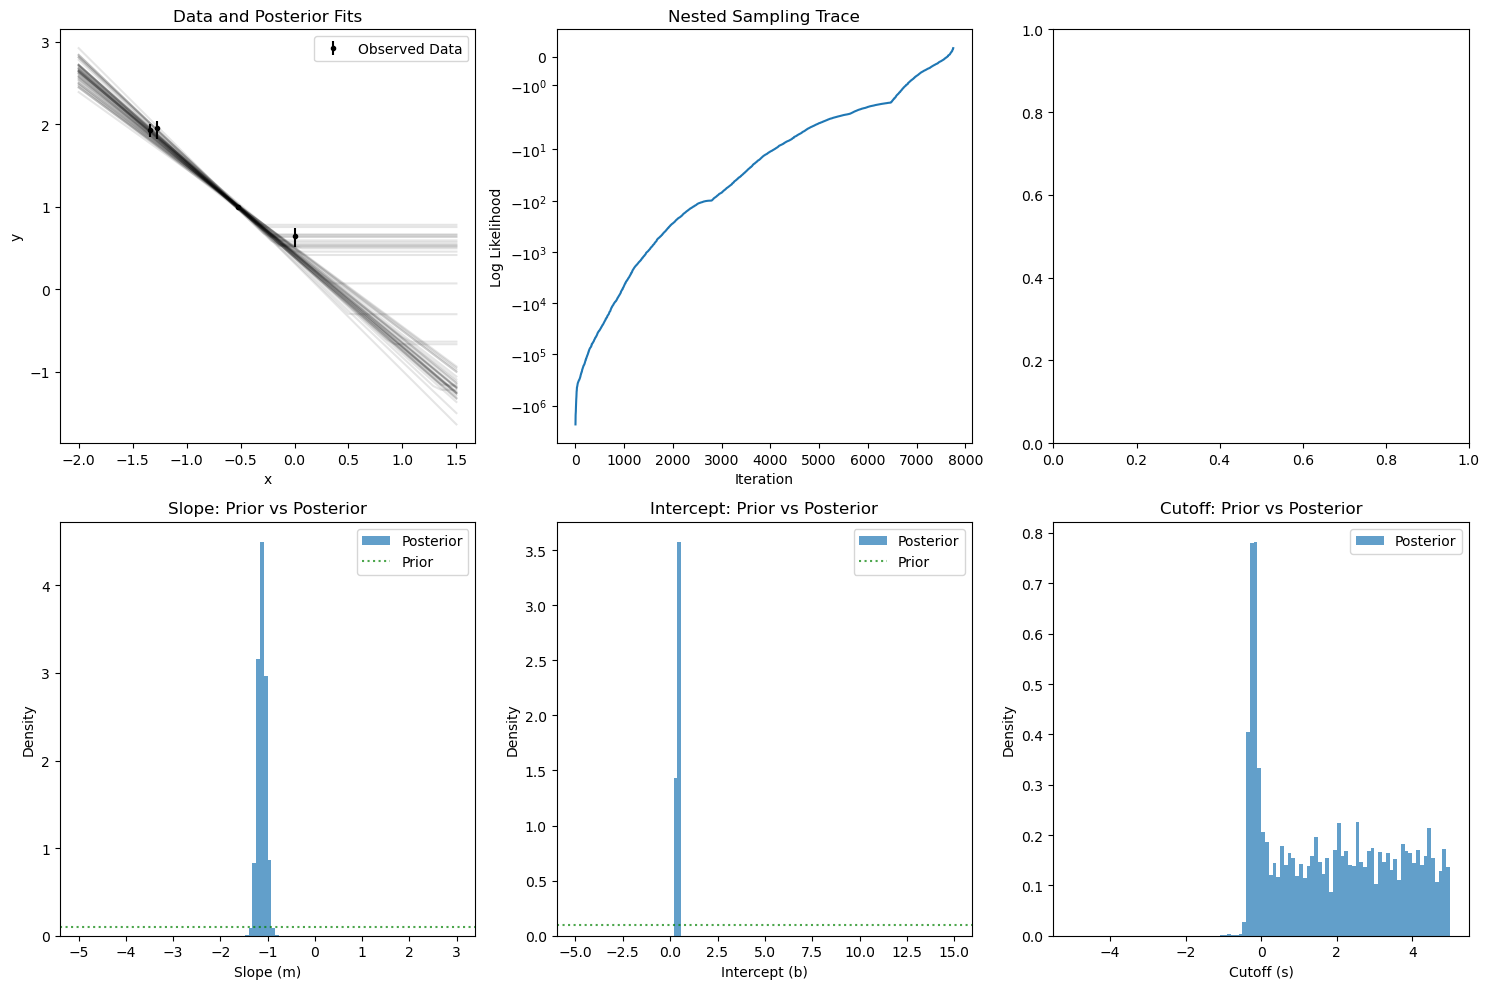

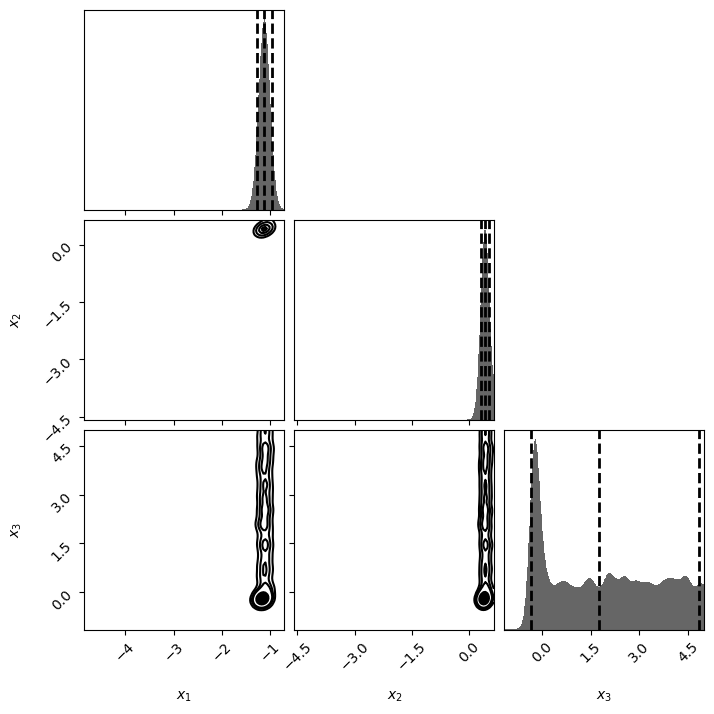

In [355]:
results_transit = mass_mh_dynesty(transit, plot_it=False, xerrs=False)
results_emission = mass_mh_dynesty(emission, plot_it=False, xerrs=False)
results_direct = mass_mh_dynesty(direct, plot_it=False, xerrs=False)
results_ss = mass_mh_dynesty(solar_system, plot_it=True, xerrs=False, oh=False)

In [356]:
from dynesty import utils as dyfunc

# Transit
samples_transit, weights_transit = results_transit.samples, results_transit.importance_weights()
mean_transit, cov_transit = dyfunc.mean_and_cov(samples_transit, weights_transit)
cov_transit = np.sqrt(np.diag(cov_transit))

# Emission
samples_emission, weights_emission = results_emission.samples, results_emission.importance_weights()
mean_emission, cov_emission = dyfunc.mean_and_cov(samples_emission, weights_emission)
cov_emission = np.sqrt(np.diag(cov_emission))

# Direct
samples_direct, weights_direct = results_direct.samples, results_direct.importance_weights()
mean_direct, cov_direct = dyfunc.mean_and_cov(samples_direct, weights_direct)
cov_direct = np.sqrt(np.diag(cov_direct))

# SS
samples_ss, weights_ss = results_ss.samples, results_ss.importance_weights()
mean_ss, cov_ss = dyfunc.mean_and_cov(samples_ss, weights_ss)
cov_ss = np.sqrt(np.diag(cov_ss))

# Transit (flat)
samples_transit_flat, weights_transit_flat = results_transit_flat.samples, results_transit_flat.importance_weights()
mean_transit_flat, cov_transit_flat = dyfunc.mean_and_cov(samples_transit_flat, weights_transit_flat)
cov_transit_flat = np.sqrt(np.diag(cov_transit_flat))

# Emission (flat)
samples_emission_flat, weights_emission_flat = results_emission_flat.samples, results_emission_flat.importance_weights()
mean_emission_flat, cov_emission_flat = dyfunc.mean_and_cov(samples_emission_flat, weights_emission_flat)
cov_emission_flat = np.sqrt(np.diag(cov_emission_flat))

# Direct (flat)
samples_direct_flat, weights_direct_flat = results_direct_flat.samples, results_direct_flat.importance_weights()
mean_direct_flat, cov_direct_flat = dyfunc.mean_and_cov(samples_direct_flat, weights_direct_flat)
cov_direct_flat = np.sqrt(np.diag(cov_direct_flat))

# SS (flat)
samples_ss_flat, weights_ss_flat = results_ss_flat.samples, results_ss_flat.importance_weights()
mean_ss_flat, cov_ss_flat = dyfunc.mean_and_cov(samples_ss_flat, weights_ss_flat)
cov_ss_flat = np.sqrt(np.diag(cov_ss_flat))

# Print LaTeX format
latex_string = f'''
Slope & ${mean_transit[0]:0.2f}\\pm{cov_transit[0]:0.2f}$ & ${mean_emission[0]:0.2f}\\pm{cov_emission[0]:0.2f}$ & ${mean_direct[0]:0.2f}\\pm{cov_direct[0]:0.2f}$ & ${mean_ss[0]:0.2f}\\pm{cov_ss[0]:0.2f}$ \\\\
Intercept (M/H) & ${mean_transit[1]:0.2f}\\pm{cov_transit[1]:0.2f}$ & ${mean_emission[1]:0.2f}\\pm{cov_emission[1]:0.2f}$ & ${mean_direct[1]:0.2f}\\pm{cov_direct[1]:0.2f}$ & ${mean_ss[1]:0.2f}\\pm{cov_ss[1]:0.2f}$ \\\\
Mass Cutoff (log10) & ${mean_transit[2]:0.2f}\\pm{cov_transit[2]:0.2f}$ & ${mean_emission[2]:0.2f}\\pm{cov_emission[2]:0.2f}$ & ${mean_direct[2]:0.2f}\\pm{cov_direct[2]:0.2f}$ & ${mean_ss[2]:0.2f}\\pm{cov_ss[2]:0.2f}$ \\\\
$\\ln E$ & ${np.max(results_transit.logz):0.2f} \\pm 0.2$ & ${np.max(results_emission.logz):0.2f} \\pm 0.2$ & ${np.max(results_direct.logz):0.2f} \\pm 0.2$ & ${np.max(results_ss.logz):0.2f} \\pm 0.2$ \\\\
\\hline \\
\\multicolumn{{4}}{{c}}{{\\textbf{{Flat-Line}}}} \\\\
\\textbf{{Parameter}} & \textbf{{Transiting}} & \\textbf{{Eclipse}} & \\textbf{{Direct}} & \\textbf{{Solar System}} \\\\
\\hline \\
Intercept (M/H) & ${mean_transit_flat[0]:0.2f}\\pm{cov_transit_flat[0]:0.2f}$ & ${mean_emission_flat[0]:0.2f}\\pm{cov_emission_flat[0]:0.2f}$ & ${mean_direct_flat[0]:0.2f}\\pm{cov_direct_flat[0]:0.2f}$ & ${mean_ss_flat[0]:0.2f}\\pm{cov_ss_flat[0]:0.2f}$ \\\\
'''
print(latex_string)


Slope & $-1.80\pm0.36$ & $-1.75\pm0.16$ & $-1.71\pm0.15$ & $-1.12\pm0.09$ \\
Intercept (M/H) & $-0.34\pm0.41$ & $0.28\pm0.04$ & $2.52\pm0.16$ & $0.41\pm0.07$ \\
Mass Cutoff (log10) & $-0.51\pm0.13$ & $0.22\pm0.02$ & $3.20\pm1.07$ & $1.87\pm1.71$ \\
$\ln E$ & $-118.23 \pm 0.2$ & $-153.82 \pm 0.2$ & $-146.40 \pm 0.2$ & $-11.87 \pm 0.2$ \\
\hline \
\multicolumn{4}{c}{\textbf{Flat-Line}} \\
\textbf{Parameter} & 	extbf{Transiting} & \textbf{Eclipse} & \textbf{Direct} & \textbf{Solar System} \\
\hline \
Intercept (M/H) & $0.94\pm0.04$ & $0.11\pm0.03$ & $0.71\pm0.03$ & $1.04\pm0.02$ \\



## O/H

In [395]:
results_transit_flat = mass_mh_dynesty_flat(transit, plot_it=False, xerrs=False, oh=True)
results_emission_flat = mass_mh_dynesty_flat(emission, plot_it=False, xerrs=False, oh=True)
results_direct_flat = mass_mh_dynesty_flat(direct, plot_it=False, xerrs=False, oh=True)
results_ss_flat = mass_mh_dynesty_flat(solar_system, plot_it=False, xerrs=False, oh=True)

Running nested sampling...


3738it [00:01, 2000.98it/s, +500 | bound: 5 | nc: 1 | ncall: 21154 | eff(%): 20.519 | loglstar:   -inf < -186.010 <    inf | logz: -191.126 +/-  0.094 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -191.13 ± 0.12
Number of likelihood evaluations: 3738

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    9.692    [9.653, 9.728] [0.039, 0.036]
Running nested sampling...


3801it [00:01, 1993.97it/s, +500 | bound: 5 | nc: 1 | ncall: 20913 | eff(%): 21.070 | loglstar:   -inf < -202.965 <    inf | logz: -208.207 +/-  0.095 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -208.21 ± 0.12
Number of likelihood evaluations: 3801

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    8.807    [8.774, 8.842] [0.033, 0.036]
Running nested sampling...


3919it [00:01, 2094.81it/s, +500 | bound: 5 | nc: 1 | ncall: 22041 | eff(%): 20.514 | loglstar:   -inf < -161.703 <    inf | logz: -167.180 +/-  0.097 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -167.18 ± 0.12
Number of likelihood evaluations: 3919

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    9.372    [9.339, 9.403] [0.032, 0.032]
Running nested sampling...


4302it [00:01, 2215.34it/s, +500 | bound: 6 | nc: 1 | ncall: 22938 | eff(%): 21.401 | loglstar:   -inf < -99.398 <    inf | logz: -105.641 +/-  0.105 | dlogz:  0.000 >  0.100]


Nested Sampling Results:
Log Evidence: -105.64 ± 0.13
Number of likelihood evaluations: 4302

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    9.731    [9.715, 9.748] [0.016, 0.017]


In [396]:
results_transit = mass_mh_dynesty(transit, plot_it=False, xerrs=False, oh=True)
results_emission = mass_mh_dynesty(emission, plot_it=False, xerrs=False, oh=True)
results_direct = mass_mh_dynesty(direct, plot_it=False, xerrs=False, oh=True)
results_ss = mass_mh_dynesty(solar_system, plot_it=False, xerrs=False, oh=True)

Running nested sampling...


2455it [00:01, 933.67it/s, bound: 10 | nc: 11 | ncall: 25492 | eff(%):  9.630 | loglstar:   -inf < -187.018 <    inf | logz: -194.368 +/-  0.114 | dlogz: 86.705 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex pos


Nested Sampling Results:
Log Evidence: -111.49 ± 0.18
Number of likelihood evaluations: 7108

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.786   [-2.181, -1.453] [0.395, 0.333]
intercept (b) 8.419    [7.944, 8.800] [0.475, 0.381]
cutoff (s)   -0.534   [-0.649, -0.384] [0.114, 0.150]
Running nested sampling...


2802it [00:06, 95.65it/s, bound: 50 | nc: 97 | ncall: 55041 | eff(%):  5.091 | loglstar:   -inf < -202.967 <    inf | logz: -209.396 +/-  0.108 | dlogz: 70.898 >  0.100]  /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex pos


Nested Sampling Results:
Log Evidence: -142.75 ± 0.20
Number of likelihood evaluations: 8393

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.806   [-1.968, -1.638] [0.162, 0.168]
intercept (b) 8.951    [8.911, 8.990] [0.041, 0.039]
cutoff (s)   0.222    [0.210, 0.235] [0.012, 0.013]
Running nested sampling...


2518it [00:02, 512.51it/s, bound: 19 | nc: 34 | ncall: 32684 | eff(%):  7.704 | loglstar:   -inf < -163.908 <    inf | logz: -171.361 +/-  0.114 | dlogz: 50.643 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
2729it [00:05, 175.44it/s, bound: 44 | nc: 80 | ncall: 50705 | eff(%):  5.382 | loglstar:   -inf < -161.848 <    inf | logz: -168.561 +/-  0.110 | dlogz: 47.406 >  0.100]/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds de


Nested Sampling Results:
Log Evidence: -125.13 ± 0.16
Number of likelihood evaluations: 6055

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.529   [-1.682, -1.368] [0.153, 0.162]
intercept (b) 10.987   [10.814, 11.154] [0.174, 0.166]
cutoff (s)   3.175    [1.857, 4.448] [1.317, 1.273]
Running nested sampling...


2684it [00:03, 486.58it/s, bound: 25 | nc: 25 | ncall: 36420 | eff(%):  7.370 | loglstar:   -inf < -105.507 <    inf | logz: -114.436 +/-  0.126 | dlogz: 107.133 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex po


Nested Sampling Results:
Log Evidence: -11.92 ± 0.18
Number of likelihood evaluations: 7281

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.126   [-1.209, -1.048] [0.083, 0.078]
intercept (b) 9.102    [9.049, 9.151] [0.053, 0.049]
cutoff (s)   1.632    [-0.184, 3.992] [1.816, 2.360]


In [397]:
from dynesty import utils as dyfunc

# Transit
samples_transit, weights_transit = results_transit.samples, results_transit.importance_weights()
mean_transit, cov_transit = dyfunc.mean_and_cov(samples_transit, weights_transit)
cov_transit = np.sqrt(np.diag(cov_transit))

# Emission
samples_emission, weights_emission = results_emission.samples, results_emission.importance_weights()
mean_emission, cov_emission = dyfunc.mean_and_cov(samples_emission, weights_emission)
cov_emission = np.sqrt(np.diag(cov_emission))

# Direct
samples_direct, weights_direct = results_direct.samples, results_direct.importance_weights()
mean_direct, cov_direct = dyfunc.mean_and_cov(samples_direct, weights_direct)
cov_direct = np.sqrt(np.diag(cov_direct))

# SS
samples_ss, weights_ss = results_ss.samples, results_ss.importance_weights()
mean_ss, cov_ss = dyfunc.mean_and_cov(samples_ss, weights_ss)
cov_ss = np.sqrt(np.diag(cov_ss))

# Transit (flat)
samples_transit_flat, weights_transit_flat = results_transit_flat.samples, results_transit_flat.importance_weights()
mean_transit_flat, cov_transit_flat = dyfunc.mean_and_cov(samples_transit_flat, weights_transit_flat)
cov_transit_flat = np.sqrt(np.diag(cov_transit_flat))

# Emission (flat)
samples_emission_flat, weights_emission_flat = results_emission_flat.samples, results_emission_flat.importance_weights()
mean_emission_flat, cov_emission_flat = dyfunc.mean_and_cov(samples_emission_flat, weights_emission_flat)
cov_emission_flat = np.sqrt(np.diag(cov_emission_flat))

# Direct (flat)
samples_direct_flat, weights_direct_flat = results_direct_flat.samples, results_direct_flat.importance_weights()
mean_direct_flat, cov_direct_flat = dyfunc.mean_and_cov(samples_direct_flat, weights_direct_flat)
cov_direct_flat = np.sqrt(np.diag(cov_direct_flat))

# SS (flat)
samples_ss_flat, weights_ss_flat = results_ss_flat.samples, results_ss_flat.importance_weights()
mean_ss_flat, cov_ss_flat = dyfunc.mean_and_cov(samples_ss_flat, weights_ss_flat)
cov_ss_flat = np.sqrt(np.diag(cov_ss_flat))

# Print LaTeX format
latex_string = f'''
Slope & ${mean_transit[0]:0.2f}\\pm{cov_transit[0]:0.2f}$ & ${mean_emission[0]:0.2f}\\pm{cov_emission[0]:0.2f}$ & ${mean_direct[0]:0.2f}\\pm{cov_direct[0]:0.2f}$ & ${mean_ss[0]:0.2f}\\pm{cov_ss[0]:0.2f}$ \\\\
Intercept (M/H) & ${mean_transit[1]:0.2f}\\pm{cov_transit[1]:0.2f}$ & ${mean_emission[1]:0.2f}\\pm{cov_emission[1]:0.2f}$ & ${mean_direct[1]:0.2f}\\pm{cov_direct[1]:0.2f}$ & ${mean_ss[1]:0.2f}\\pm{cov_ss[1]:0.2f}$ \\\\
Mass Cutoff (log10) & ${mean_transit[2]:0.2f}\\pm{cov_transit[2]:0.2f}$ & ${mean_emission[2]:0.2f}\\pm{cov_emission[2]:0.2f}$ & ${mean_direct[2]:0.2f}\\pm{cov_direct[2]:0.2f}$ & ${mean_ss[2]:0.2f}\\pm{cov_ss[2]:0.2f}$ \\\\
$\\ln E$ & ${np.max(results_transit.logz):0.2f} \\pm 0.2$ & ${np.max(results_emission.logz):0.2f} \\pm 0.2$ & ${np.max(results_direct.logz):0.2f} \\pm 0.2$ & ${np.max(results_ss.logz):0.2f} \\pm 0.2$ \\\\
\\hline \\
\\multicolumn{{4}}{{c}}{{\\textbf{{Flat-Line}}}} \\\\
\\textbf{{Parameter}} & \\textbf{{Transiting}} & \\textbf{{Eclipse}} & \\textbf{{Direct}} & \\textbf{{Solar System}} \\\\
\\hline \\
Intercept (M/H) & ${mean_transit_flat[0]:0.2f}\\pm{cov_transit_flat[0]:0.2f}$ & ${mean_emission_flat[0]:0.2f}\\pm{cov_emission_flat[0]:0.2f}$ & ${mean_direct_flat[0]:0.2f}\\pm{cov_direct_flat[0]:0.2f}$ & ${mean_ss_flat[0]:0.2f}\\pm{cov_ss_flat[0]:0.2f}$ \\\\
'''
print(latex_string)


Slope & $-1.82\pm0.36$ & $-1.81\pm0.16$ & $-1.53\pm0.16$ & $-1.13\pm0.09$ \\
Intercept (M/H) & $8.37\pm0.41$ & $8.95\pm0.04$ & $10.99\pm0.17$ & $9.10\pm0.07$ \\
Mass Cutoff (log10) & $-0.52\pm0.12$ & $0.22\pm0.02$ & $3.15\pm1.09$ & $1.81\pm1.75$ \\
$\ln E$ & $-111.49 \pm 0.2$ & $-142.75 \pm 0.2$ & $-125.13 \pm 0.2$ & $-11.92 \pm 0.2$ \\
\hline \
\multicolumn{4}{c}{\textbf{Flat-Line}} \\
\textbf{Parameter} & \textbf{Transiting} & \textbf{Eclipse} & \textbf{Direct} & \textbf{Solar System} \\
\hline \
Intercept (M/H) & $9.69\pm0.04$ & $8.81\pm0.03$ & $9.37\pm0.03$ & $9.73\pm0.02$ \\



/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_27622/3002674758.py:73: RuntimeWarning: invalid value encountered in log10
  MF = np.log10(factorZ*CM * 1e12)


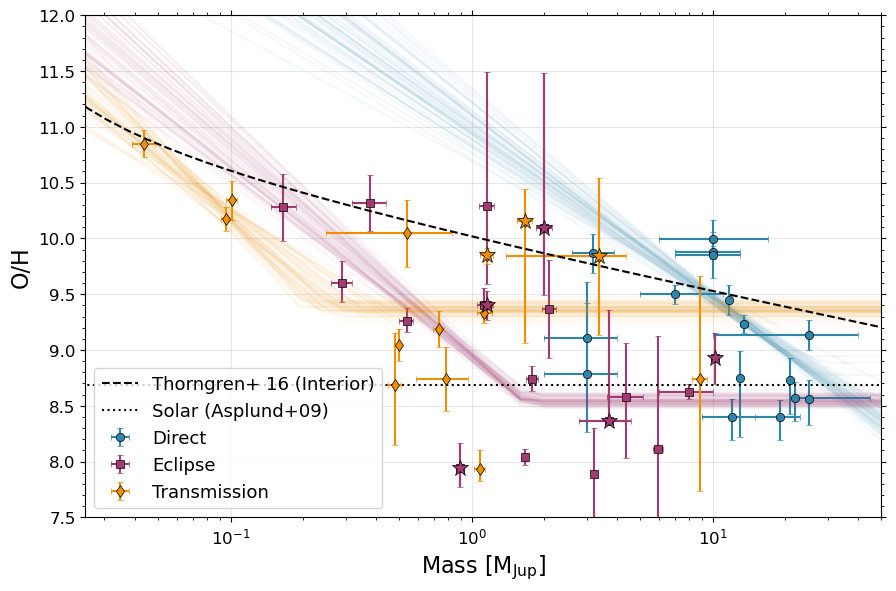

In [398]:
fig, ax = plt.subplots(figsize=(9, 6))

#x = 10**(np.linspace(-2,2.0))
#fit = np.log10(9.7*(x**-0.45)) #[M/H] ~ log10(Z/Zs)
#ax.plot(x,fit,'k--',label='Thorgren+ 2016',zorder=1,alpha=0.75)
#plot w/o solar system for o/h
for data, result, label, marker, color in zip([direct, emission, transit], 
                                     [results_direct,results_emission,results_transit],
                                     ['Direct', 'Eclipse', 'Transmission'],
                                     ['o', 's', 'd'],
                                     ['#2E86AB', '#A23B72', '#F18F01']):
    ax.errorbar(data['Mass'], data['O/H'],
                xerr=[data['Mass Lower'], data['Mass Upper']],
                yerr=[data['O/H Lower'], data['O/H Upper']],
                fmt=marker, label=label, color=color,
                markersize=6, capsize=2, alpha=1.0,
                markeredgecolor='k',markeredgewidth=0.5)

    n_samples = min(50, len(result['samples']))
    indices = np.random.choice(len(result['samples']), n_samples, p=result.importance_weights()/np.sum(result.importance_weights()))
    xfake = np.linspace(-2,2.5)
    for idx in indices:  # Plot subset for clarity
        m_sample, b_sample, s_sample = result['samples'][idx, 0], result['samples'][idx, 1], result['samples'][idx, 2]
        y_sample = m_sample * xfake + b_sample
        y_sample[np.where(xfake > s_sample)[0]] = m_sample * s_sample + b_sample
    
        ax.plot(10**xfake, y_sample, '-', alpha=0.05, color=color)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    ax.errorbar(row['Mass'], row['O/H'],
                xerr=[[row['Mass Lower']], [row['Mass Upper']]],
                yerr=[[row['O/H Lower']], [row['O/H Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12,
                markeredgecolor='k',markeredgewidth=0.5)

ax.set_xlim(0.025,50)
ax.set_xscale('log')

ax.set_ylim(7.5,12)

ax.set_xlabel(r'Mass [M$_{\mathrm{Jup}}$]', fontsize=16)
ax.set_ylabel('O/H', fontsize=16)
ax.legend(frameon=True, fancybox=True, shadow=False,fontsize=13)
ax.grid(True, alpha=0.3)

ax.minorticks_on()

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.tight_layout()

ax.tick_params(labelsize=12)

#8.69
#9.7*M&-0.45
#ax.plot( np.logspace(-2,2), 8.69 + np.log10((9.7*np.logspace(-1,1)**-0.45)),'--k') #Thorngren, kinda - mass fraction
#plt.savefig('mass_metallicity_fits_oh.pdf')

X = 0.7381
Y = 0.2485
Z = 0.0134
ZM = (9.7*np.logspace(-2,2)**-0.45) * Z
ZH = (10**8.69+10**8.43+10**7.83) / 1e12
muZ = 18
muH = 2.0

factorZ = (1+(Y/X)) / (((1/ZM)-1)*(muZ/muH))

#C/M
CM = 10**8.69 / (1.04e-3*1e12)
MF = np.log10(factorZ*CM * 1e12)

#8.69
#9.7*M&-0.45
#ax.plot( np.logspace(-2,2), 8.69 + np.log10((9.7*np.logspace(-1,1)**-0.45)),'--k') #Thorngren, kinda - mass fraction
ax.plot(np.logspace(-2,2),MF,'--k',label='Thorngren+ 16 (Interior)')

ax.hlines(8.69,-2,100,'k',linestyle=':',label='Solar (Asplund+09)')

ax.legend(frameon=True, fancybox=True, shadow=False,fontsize=13)

plt.savefig('./paper_figs/mass_metallicity_fits_oh.pdf')

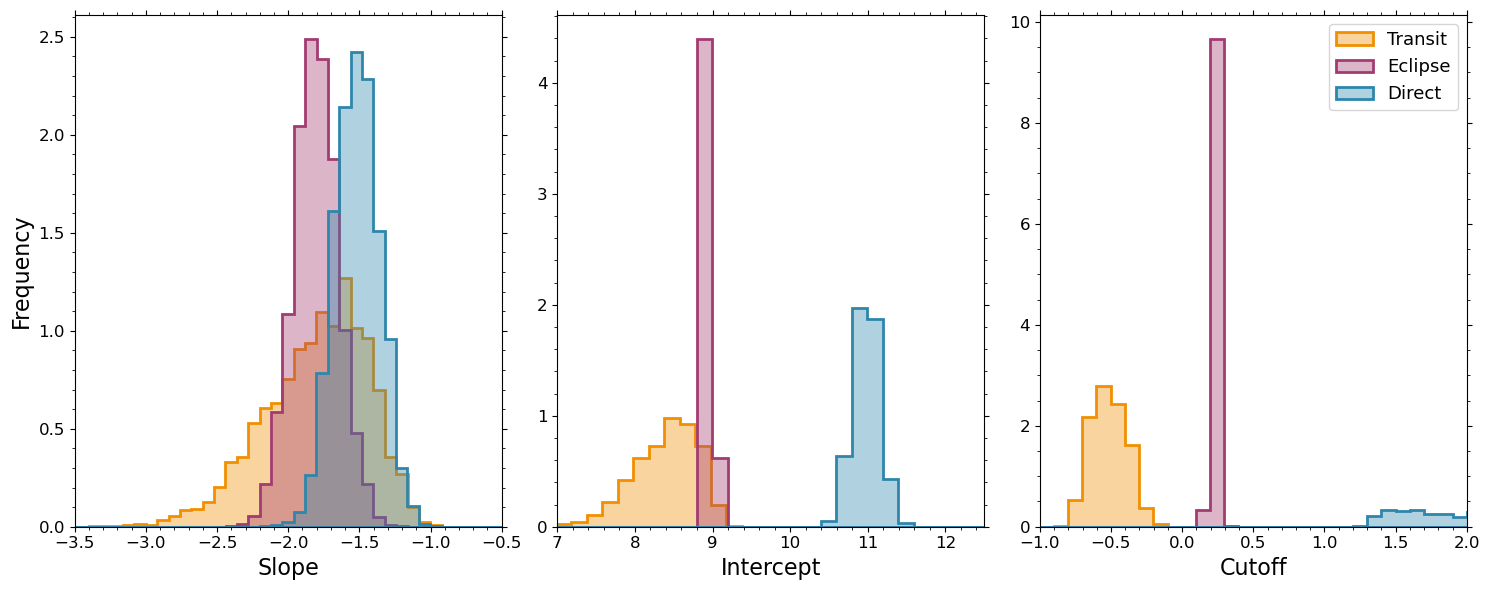

In [361]:
params = ['Slope', 'Intercept', 'Cutoff']
color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01','Solar System': '#808080'}

# Extract posterior samples
samples = results_transit['samples']
weights = results_transit.importance_weights()
lw = 2

fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].hist(results_transit['samples'][:, 0],weights = results_transit.importance_weights(),density=True,bins=100,label='Transit',
           ec=color_map['Transit'],fc=color_map['Transit'] + '60',histtype='stepfilled',linewidth=lw)
ax[0].hist(results_emission['samples'][:, 0],weights = results_emission.importance_weights(),density=True,bins=100,label='Eclipse',
           ec=color_map['Eclipse'],fc=color_map['Eclipse'] + '60',histtype='stepfilled',linewidth=lw)
ax[0].hist(results_direct['samples'][:, 0],weights = results_direct.importance_weights(),density=True,bins=100,label='Direct',
           ec=color_map['Direct'],fc=color_map['Direct'] + '60',histtype='stepfilled',linewidth=lw)
#ax[0].hist(results_ss['samples'][:, 0],weights = results_ss.importance_weights(),density=True,bins=100,label='Solar System',
#           ec=color_map['Solar System'],fc=color_map['Solar System'] + '60',histtype='stepfilled',linewidth=lw)


#ax[0].set_title(f'{params[0]}')
ax[0].set_xlim(-3.5,-0.5)
ax[0].set_ylabel('Frequency',fontsize=16)
ax[0].set_xlabel(f'{params[0]}',fontsize=16)
ax[0].tick_params(labelsize=12)

ax[1].hist(results_transit['samples'][:, 1],weights = results_transit.importance_weights(),density=True,bins=100,label='Transit',
           ec=color_map['Transit'],fc=color_map['Transit'] + '60',histtype='stepfilled',linewidth=lw)
ax[1].hist(results_emission['samples'][:, 1],weights = results_emission.importance_weights(),density=True,bins=100,label='Eclipse',
           ec=color_map['Eclipse'],fc=color_map['Eclipse'] + '60',histtype='stepfilled',linewidth=lw)
ax[1].hist(results_direct['samples'][:, 1],weights = results_direct.importance_weights(),density=True,bins=100,label='Direct',
           ec=color_map['Direct'],fc=color_map['Direct'] + '60',histtype='stepfilled',linewidth=lw)
#ax[1].hist(results_ss['samples'][:, 1],weights = results_ss.importance_weights(),density=True,bins=100,label='Solar System',
#           ec=color_map['Solar System'],fc=color_map['Solar System'] + '60',histtype='stepfilled',linewidth=lw)

#ax[1].set_title(f'{params[1]}')
ax[1].set_xlim(7,12.5)
ax[1].set_xlabel(f'{params[1]}',fontsize=16)
ax[1].tick_params(labelsize=12)

ax[2].hist(results_transit['samples'][:, 2],weights = results_transit.importance_weights(),density=True,bins=100,label='Transit',
           ec=color_map['Transit'],fc=color_map['Transit'] + '60',histtype='stepfilled',linewidth=lw)
ax[2].hist(results_emission['samples'][:, 2],weights = results_emission.importance_weights(),density=True,bins=100,label='Eclipse',
           ec=color_map['Eclipse'],fc=color_map['Eclipse'] + '60',histtype='stepfilled',linewidth=lw)
ax[2].hist(results_direct['samples'][:, 2],weights = results_direct.importance_weights(),density=True,bins=100,label='Direct',
           ec=color_map['Direct'],fc=color_map['Direct'] + '60',histtype='stepfilled',linewidth=lw)
#ax[2].hist(results_ss['samples'][:, 2],weights = results_ss.importance_weights(),density=True,bins=100,label='Solar System',
#           ec=color_map['Solar System'],fc=color_map['Solar System'] + '60',histtype='stepfilled',linewidth=lw)

#ax[2].set_title(f'{params[2]}')
ax[2].set_xlim(-1,2)
ax[2].set_xlabel(f'{params[2]}',fontsize=16)
ax[2].tick_params(labelsize=12)
ax[2].legend(fontsize=13)

ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()

ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')
ax[2].yaxis.set_ticks_position('both')
ax[2].xaxis.set_ticks_position('both')

plt.tight_layout()

#ax.tick_params(labelsize=12)

plt.savefig('./paper_figs/mass_metallicity_posteriors_oh.pdf')

## C/H

In [22]:
results_transit_flat = mass_mh_dynesty_flat(transit, plot_it=False, xerrs=False, ch=True)
results_emission_flat = mass_mh_dynesty_flat(emission, plot_it=False, xerrs=False, ch=True)
results_direct_flat = mass_mh_dynesty_flat(direct, plot_it=False, xerrs=False, ch=True)
results_ss_flat = mass_mh_dynesty_flat(solar_system, plot_it=False, xerrs=False,ch=True)

Running nested sampling...


3928it [00:01, 2113.94it/s, +500 | bound: 5 | nc: 1 | ncall: 22928 | eff(%): 19.743 | loglstar:   -inf < -167.040 <    inf | logz: -172.535 +/-  0.097 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -172.54 ± 0.12
Number of likelihood evaluations: 3928

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    9.414    [9.376, 9.456] [0.038, 0.042]
Running nested sampling...


3825it [00:01, 1954.41it/s, +500 | bound: 5 | nc: 1 | ncall: 20762 | eff(%): 21.345 | loglstar:   -inf < -213.893 <    inf | logz: -219.182 +/-  0.095 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -219.18 ± 0.12
Number of likelihood evaluations: 3825

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    8.508    [8.477, 8.540] [0.031, 0.033]
Running nested sampling...


3948it [00:02, 1953.13it/s, +500 | bound: 5 | nc: 1 | ncall: 22012 | eff(%): 20.677 | loglstar:   -inf < -202.967 <    inf | logz: -208.503 +/-  0.098 | dlogz:  0.000 >  0.100]



Nested Sampling Results:
Log Evidence: -208.50 ± 0.12
Number of likelihood evaluations: 3948

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    9.146    [9.114, 9.175] [0.031, 0.029]
Running nested sampling...


4314it [00:02, 2152.82it/s, +500 | bound: 6 | nc: 1 | ncall: 22292 | eff(%): 22.091 | loglstar:   -inf < -99.398 <    inf | logz: -105.665 +/-  0.105 | dlogz:  0.000 >  0.100]


Nested Sampling Results:
Log Evidence: -105.67 ± 0.13
Number of likelihood evaluations: 4314

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    9.471    [9.454, 9.488] [0.016, 0.017]


In [23]:
results_transit = mass_mh_dynesty(transit, plot_it=False, xerrs=False, ch=True)
results_emission = mass_mh_dynesty(emission, plot_it=False, xerrs=False, ch=True)
results_direct = mass_mh_dynesty(direct, plot_it=False, xerrs=False, ch=True)
results_ss = mass_mh_dynesty(solar_system, plot_it=False, xerrs=False,ch=True)

Running nested sampling...


2429it [00:01, 907.43it/s, bound: 10 | nc: 50 | ncall: 25389 | eff(%):  9.567 | loglstar:   -inf < -170.749 <    inf | logz: -178.375 +/-  0.117 | dlogz: 62.769 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
2578it [00:03, 432.22it/s, bound: 20 | nc: 19 | ncall: 32391 | eff(%):  7.959 | loglstar:   -inf < -167.759 <    inf | logz: -175.062 +/-  0.113 | dlogz: 59.144 >  0.100]/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds de


Nested Sampling Results:
Log Evidence: -121.38 ± 0.18
Number of likelihood evaluations: 7069

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.637   [-2.062, -1.276] [0.425, 0.361]
intercept (b) 8.151    [7.657, 8.565] [0.494, 0.413]
cutoff (s)   -0.606   [-0.725, -0.450] [0.119, 0.156]
Running nested sampling...


2614it [00:03, 357.00it/s, bound: 23 | nc: 30 | ncall: 34238 | eff(%):  7.635 | loglstar:   -inf < -214.572 <    inf | logz: -221.876 +/-  0.113 | dlogz: 68.133 >  0.100]  /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
2744it [00:05, 170.50it/s, bound: 36 | nc: 10 | ncall: 44068 | eff(%):  6.227 | loglstar:   -inf < -213.933 <    inf | logz: -220.551 +/-  0.110 | dlogz: 68.069 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds 


Nested Sampling Results:
Log Evidence: -157.49 ± 0.19
Number of likelihood evaluations: 7991

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.757   [-1.954, -1.540] [0.197, 0.217]
intercept (b) 8.725    [8.679, 8.770] [0.046, 0.045]
cutoff (s)   0.268    [0.217, 0.369] [0.051, 0.102]
Running nested sampling...


2612it [00:05, 212.43it/s, bound: 39 | nc: 47 | ncall: 46084 | eff(%):  5.668 | loglstar:   -inf < -203.016 <    inf | logz: -209.399 +/-  0.107 | dlogz: 67.432 >  0.100] /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex pos


Nested Sampling Results:
Log Evidence: -146.30 ± 0.16
Number of likelihood evaluations: 6007

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.696   [-1.840, -1.562] [0.144, 0.134]
intercept (b) 10.934   [10.788, 11.085] [0.146, 0.150]
cutoff (s)   3.228    [1.927, 4.460] [1.301, 1.231]
Running nested sampling...


2750it [00:05, 261.91it/s, bound: 42 | nc: 7 | ncall: 48335 | eff(%):  5.689 | loglstar:   -inf < -99.990 <    inf | logz: -108.011 +/-  0.120 | dlogz: 100.851 >  0.100]   /Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex posterior shape. You may consider using more livepoints or different sampler (i.e. rslice or rwalk) or alternatively disable bootstrap (bootstrap=0)
  warnings.warn(
/Users/jlothringer/miniconda3/envs/research/lib/python3.12/site-packages/dynesty/bounding.py:617: UserWarning: The enlargement factor for the ellipsoidal bounds determined from bootstrapping is very large. If you are using uniform sampling that may mean that the sampling will be inefficient. This may be caused by a very complex po


Nested Sampling Results:
Log Evidence: -11.89 ± 0.17
Number of likelihood evaluations: 7265

Parameter Estimates:
Parameter    Median   68% CI - / +
---------------------------------------------
slope (m)    -1.129   [-1.207, -1.044] [0.078, 0.085]
intercept (b) 8.840    [8.790, 8.890] [0.051, 0.050]
cutoff (s)   1.803    [-0.171, 4.060] [1.974, 2.257]


In [24]:
from dynesty import utils as dyfunc

# Transit
samples_transit, weights_transit = results_transit.samples, results_transit.importance_weights()
mean_transit, cov_transit = dyfunc.mean_and_cov(samples_transit, weights_transit)
cov_transit = np.sqrt(np.diag(cov_transit))

# Emission
samples_emission, weights_emission = results_emission.samples, results_emission.importance_weights()
mean_emission, cov_emission = dyfunc.mean_and_cov(samples_emission, weights_emission)
cov_emission = np.sqrt(np.diag(cov_emission))

# Direct
samples_direct, weights_direct = results_direct.samples, results_direct.importance_weights()
mean_direct, cov_direct = dyfunc.mean_and_cov(samples_direct, weights_direct)
cov_direct = np.sqrt(np.diag(cov_direct))

# SS
samples_ss, weights_ss = results_ss.samples, results_ss.importance_weights()
mean_ss, cov_ss = dyfunc.mean_and_cov(samples_ss, weights_ss)
cov_ss = np.sqrt(np.diag(cov_ss))

# Transit (flat)
samples_transit_flat, weights_transit_flat = results_transit_flat.samples, results_transit_flat.importance_weights()
mean_transit_flat, cov_transit_flat = dyfunc.mean_and_cov(samples_transit_flat, weights_transit_flat)
cov_transit_flat = np.sqrt(np.diag(cov_transit_flat))

# Emission (flat)
samples_emission_flat, weights_emission_flat = results_emission_flat.samples, results_emission_flat.importance_weights()
mean_emission_flat, cov_emission_flat = dyfunc.mean_and_cov(samples_emission_flat, weights_emission_flat)
cov_emission_flat = np.sqrt(np.diag(cov_emission_flat))

# Direct (flat)
samples_direct_flat, weights_direct_flat = results_direct_flat.samples, results_direct_flat.importance_weights()
mean_direct_flat, cov_direct_flat = dyfunc.mean_and_cov(samples_direct_flat, weights_direct_flat)
cov_direct_flat = np.sqrt(np.diag(cov_direct_flat))

# SS (flat)
samples_ss_flat, weights_ss_flat = results_ss_flat.samples, results_ss_flat.importance_weights()
mean_ss_flat, cov_ss_flat = dyfunc.mean_and_cov(samples_ss_flat, weights_ss_flat)
cov_ss_flat = np.sqrt(np.diag(cov_ss_flat))

# Print LaTeX format
latex_string = f'''
Slope & ${mean_transit[0]:0.2f}\\pm{cov_transit[0]:0.2f}$ & ${mean_emission[0]:0.2f}\\pm{cov_emission[0]:0.2f}$ & ${mean_direct[0]:0.2f}\\pm{cov_direct[0]:0.2f}$ & ${mean_ss[0]:0.2f}\\pm{cov_ss[0]:0.2f}$ \\\\
Intercept (M/H) & ${mean_transit[1]:0.2f}\\pm{cov_transit[1]:0.2f}$ & ${mean_emission[1]:0.2f}\\pm{cov_emission[1]:0.2f}$ & ${mean_direct[1]:0.2f}\\pm{cov_direct[1]:0.2f}$ & ${mean_ss[1]:0.2f}\\pm{cov_ss[1]:0.2f}$ \\\\
Mass Cutoff (log10) & ${mean_transit[2]:0.2f}\\pm{cov_transit[2]:0.2f}$ & ${mean_emission[2]:0.2f}\\pm{cov_emission[2]:0.2f}$ & ${mean_direct[2]:0.2f}\\pm{cov_direct[2]:0.2f}$ & ${mean_ss[2]:0.2f}\\pm{cov_ss[2]:0.2f}$ \\\\
$\\ln E$ & ${np.max(results_transit.logz):0.2f} \\pm 0.2$ & ${np.max(results_emission.logz):0.2f} \\pm 0.2$ & ${np.max(results_direct.logz):0.2f} \\pm 0.2$ & ${np.max(results_ss.logz):0.2f} \\pm 0.2$ \\\\
\\hline \\
\\multicolumn{{4}}{{c}}{{\\textbf{{Flat-Line}}}} \\\\
\\textbf{{Parameter}} & \\textbf{{Transiting}} & \\textbf{{Eclipse}} & \\textbf{{Direct}} & \\textbf{{Solar System}} \\\\
\\hline \\
Intercept (M/H) & ${mean_transit_flat[0]:0.2f}\\pm{cov_transit_flat[0]:0.2f}$ & ${mean_emission_flat[0]:0.2f}\\pm{cov_emission_flat[0]:0.2f}$ & ${mean_direct_flat[0]:0.2f}\\pm{cov_direct_flat[0]:0.2f}$ & ${mean_ss_flat[0]:0.2f}\\pm{cov_ss_flat[0]:0.2f}$ \\\\
'''
print(latex_string)


Slope & $-1.67\pm0.38$ & $-1.75\pm0.20$ & $-1.70\pm0.14$ & $-1.13\pm0.09$ \\
Intercept (M/H) & $8.11\pm0.44$ & $8.72\pm0.05$ & $10.94\pm0.15$ & $8.84\pm0.08$ \\
Mass Cutoff (log10) & $-0.59\pm0.14$ & $0.29\pm0.07$ & $3.19\pm1.08$ & $1.88\pm1.75$ \\
$\ln E$ & $-121.38 \pm 0.2$ & $-157.49 \pm 0.2$ & $-146.30 \pm 0.2$ & $-11.89 \pm 0.2$ \\
\hline \
\multicolumn{4}{c}{\textbf{Flat-Line}} \\
\textbf{Parameter} & \textbf{Transiting} & \textbf{Eclipse} & \textbf{Direct} & \textbf{Solar System} \\
\hline \
Intercept (M/H) & $9.42\pm0.04$ & $8.51\pm0.03$ & $9.15\pm0.03$ & $9.47\pm0.02$ \\



/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/1030749266.py:68: RuntimeWarning: invalid value encountered in log10
  MF = np.log10(factorZ*CM * 1e12)
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_3036/1030749266.py:80: RuntimeWarning: invalid value encountered in log10
  MF2 = np.log10(factorZ2*CM * 1e12)


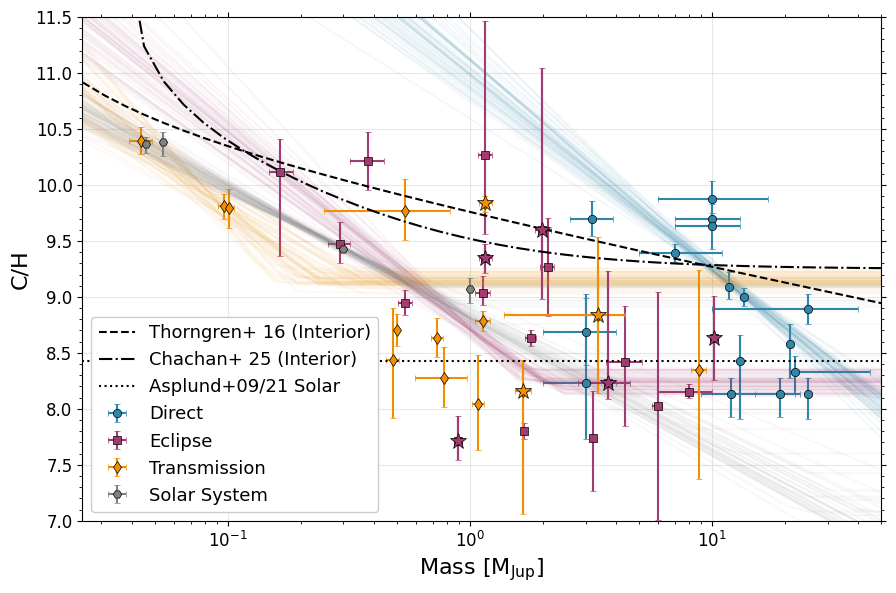

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))

#x = 10**(np.linspace(-2,2.0))
#fit = np.log10(9.7*(x**-0.45)) #[M/H] ~ log10(Z/Zs)
#ax.plot(x,fit,'k--',label='Thorgren+ 2016',zorder=1,alpha=0.75)

for data, result, label, marker, color in zip([direct, emission, transit,solar_system], 
                                     [results_direct,results_emission,results_transit,results_ss],
                                     ['Direct', 'Eclipse', 'Transmission','Solar System'],
                                     ['o', 's', 'd', 'H'],
                                     ['#2E86AB', '#A23B72', '#F18F01', '#808080']):
    ax.errorbar(data['Mass'], data['C/H'],
                xerr=[data['Mass Lower'], data['Mass Upper']],
                yerr=[data['C/H Lower'], data['C/H Upper']],
                fmt=marker, label=label, color=color,
                markersize=6, capsize=2, alpha=1.0,
                markeredgecolor='k',markeredgewidth=0.5)

    n_samples = min(50, len(result['samples']))
    indices = np.random.choice(len(result['samples']), n_samples, p=result.importance_weights()/np.sum(result.importance_weights()))
    xfake = np.linspace(-2,2.5)
    for idx in indices:  # Plot subset for clarity
        m_sample, b_sample, s_sample = result['samples'][idx, 0], result['samples'][idx, 1], result['samples'][idx, 2]
        y_sample = m_sample * xfake + b_sample
        y_sample[np.where(xfake > s_sample)[0]] = m_sample * s_sample + b_sample
    
        ax.plot(10**xfake, y_sample, '-', alpha=0.05, color=color)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    ax.errorbar(row['Mass'], row['C/H'],
                xerr=[[row['Mass Lower']], [row['Mass Upper']]],
                yerr=[[row['C/H Lower']], [row['C/H Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12,
                markeredgecolor='k',markeredgewidth=0.5)

ax.set_xlim(0.025,50)
ax.set_xscale('log')

ax.set_ylim(7.0,11.5)

ax.set_xlabel(r'Mass [M$_{\mathrm{Jup}}$]', fontsize=16)
ax.set_ylabel('C/H', fontsize=16)
ax.legend(frameon=True, fancybox=True, shadow=False,fontsize=13)
ax.grid(True, alpha=0.3)

ax.minorticks_on()

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

plt.tight_layout()

ax.tick_params(labelsize=12)

X = 0.7381
Y = 0.2485
Z = 0.0134
ZM = (9.7*np.logspace(-2,2)**-0.45) * Z
ZH = (10**8.69+10**8.43+10**7.83) / 1e12
muZ = 18
muH = 2.0

factorZ = (1+(Y/X)) / (((1/ZM)-1)*(muZ/muH))

#C/M
CM = 10**8.43 / (1.04e-3*1e12)
MF = np.log10(factorZ*CM * 1e12)

#8.69
#9.7*M&-0.45
#ax.plot( np.logspace(-2,2), 8.69 + np.log10((9.7*np.logspace(-1,1)**-0.45)),'--k') #Thorngren, kinda - mass fraction
ax.plot(np.logspace(-2,2),MF,'--k',label='Thorngren+ 16 (Interior)')

#yayaati's paper
a = 2.6
b = 3.3
ZM2 = (a/np.logspace(-2,2) + b) * Z
factorZ2 = (1+(Y/X)) / (((1/ZM2)-1)*(muZ/muH))
MF2 = np.log10(factorZ2*CM * 1e12)

ax.plot(np.logspace(-2,2),MF2,'-.k',label='Chachan+ 25 (Interior)')


ax.hlines(8.43,-2,100,'k',linestyle=':',label='Asplund+09/21 Solar')

ax.legend(frameon=True, fancybox=True, shadow=False,fontsize=13,framealpha=1.0)

plt.savefig('./paper_figs/mass_metallicity_fits_ch.pdf')

In [30]:
np.log10(ZM2)

array([2.42045086, 2.33994235, 2.25966243, 2.17965667, 2.09997925,
       2.02069449, 1.94187847, 1.86362076, 1.78602634, 1.70921753,
       1.6333358 , 1.55854341, 1.4850246 , 1.41298601, 1.3426561 ,
       1.27428305, 1.20813097, 1.14447392, 1.08358777, 1.02573989,
       0.97117723, 0.92011362, 0.87271744, 0.82910103, 0.78931321,
       0.75333599, 0.72108574, 0.69241889, 0.66714122, 0.64501952,
       0.62579432, 0.60919231, 0.59493743, 0.5827601 , 0.57240414,
       0.56363162, 0.55622562, 0.54999155, 0.54475705, 0.5403712 ,
       0.53670304, 0.5336398 , 0.53108499, 0.52895652, 0.52718484,
       0.52571126, 0.52448638, 0.52346878, 0.52262373, 0.52192224])

In [33]:
a/np.logspace(-2,2) + b

array([263.3       , 218.74712094, 181.8286997 , 151.23651675,
       125.88652545, 104.88043836,  87.47389611,  73.05009068,
        61.09790855,  51.1938192 ,  42.98686715,  36.18623564,
        30.55094149,  25.88129572,  22.0118275 ,  18.80542062,
        16.14845474,  13.94677916,  12.12237661,  10.61059861,
         9.35787471,   8.3198141 ,   7.45963267,   6.74684955,
         6.15620697,   5.66677526,   5.26121122,   4.9251435 ,
         4.64666342,   4.41590291,   4.22468488,   4.06623344,
         3.9349338 ,   3.82613331,   3.73597656,   3.66126883,
         3.5993628 ,   3.54806482,   3.50555712,   3.47033342,
         3.44114556,   3.41695925,   3.39691744,   3.38030993,
         3.36654825,   3.35514472,   3.34569528,   3.33786506,
         3.33137661,   3.326     ])

In [27]:
ZM

array([1.03246784, 0.94872826, 0.87178049, 0.80107366, 0.73610159,
       0.67639917, 0.62153898, 0.57112829, 0.52480623, 0.48224117,
       0.44312841, 0.40718793, 0.37416245, 0.34381555, 0.31592996,
       0.29030608, 0.26676044, 0.24512451, 0.22524338, 0.20697474,
       0.1901878 , 0.17476238, 0.16058807, 0.14756337, 0.13559506,
       0.12459746, 0.11449183, 0.10520583, 0.09667298, 0.0888322 ,
       0.08162735, 0.07500687, 0.06892334, 0.06333323, 0.05819651,
       0.05347641, 0.04913914, 0.04515365, 0.04149141, 0.0381262 ,
       0.03503392, 0.03219245, 0.02958145, 0.02718221, 0.02497756,
       0.02295172, 0.0210902 , 0.01937965, 0.01780784, 0.01636351])

In [19]:
params = ['Slope', 'Intercept', 'Cutoff']
color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01','Solar System': '#808080'}

# Extract posterior samples
samples = results_transit['samples']
weights = results_transit.importance_weights()
lw = 2

fig,ax = plt.subplots(1,3,figsize=(15,6))
ax[0].hist(results_transit['samples'][:, 0],weights = results_transit.importance_weights(),density=True,bins=100,label='Transit',
           ec=color_map['Transit'],fc=color_map['Transit'] + '60',histtype='stepfilled',linewidth=lw)
ax[0].hist(results_emission['samples'][:, 0],weights = results_emission.importance_weights(),density=True,bins=100,label='Eclipse',
           ec=color_map['Eclipse'],fc=color_map['Eclipse'] + '60',histtype='stepfilled',linewidth=lw)
ax[0].hist(results_direct['samples'][:, 0],weights = results_direct.importance_weights(),density=True,bins=100,label='Direct',
           ec=color_map['Direct'],fc=color_map['Direct'] + '60',histtype='stepfilled',linewidth=lw)
ax[0].hist(results_ss['samples'][:, 0],weights = results_ss.importance_weights(),density=True,bins=100,label='Solar System',
           ec=color_map['Solar System'],fc=color_map['Solar System'] + '60',histtype='stepfilled',linewidth=lw)


#ax[0].set_title(f'{params[0]}')
ax[0].set_xlim(-3.5,-0.5)
ax[0].set_ylabel('Frequency',fontsize=16)
ax[0].set_xlabel(f'{params[0]}',fontsize=16)
ax[0].tick_params(labelsize=12)

ax[1].hist(results_transit['samples'][:, 1],weights = results_transit.importance_weights(),density=True,bins=100,label='Transit',
           ec=color_map['Transit'],fc=color_map['Transit'] + '60',histtype='stepfilled',linewidth=lw)
ax[1].hist(results_emission['samples'][:, 1],weights = results_emission.importance_weights(),density=True,bins=100,label='Eclipse',
           ec=color_map['Eclipse'],fc=color_map['Eclipse'] + '60',histtype='stepfilled',linewidth=lw)
ax[1].hist(results_direct['samples'][:, 1],weights = results_direct.importance_weights(),density=True,bins=100,label='Direct',
           ec=color_map['Direct'],fc=color_map['Direct'] + '60',histtype='stepfilled',linewidth=lw)
ax[1].hist(results_ss['samples'][:, 1],weights = results_ss.importance_weights(),density=True,bins=100,label='Solar System',
           ec=color_map['Solar System'],fc=color_map['Solar System'] + '60',histtype='stepfilled',linewidth=lw)

#ax[1].set_title(f'{params[1]}')
ax[1].set_xlim(7,12.5)
ax[1].set_xlabel(f'{params[1]}',fontsize=16)
ax[1].tick_params(labelsize=12)

ax[2].hist(results_transit['samples'][:, 2],weights = results_transit.importance_weights(),density=True,bins=100,label='Transit',
           ec=color_map['Transit'],fc=color_map['Transit'] + '60',histtype='stepfilled',linewidth=lw)
ax[2].hist(results_emission['samples'][:, 2],weights = results_emission.importance_weights(),density=True,bins=100,label='Eclipse',
           ec=color_map['Eclipse'],fc=color_map['Eclipse'] + '60',histtype='stepfilled',linewidth=lw)
ax[2].hist(results_direct['samples'][:, 2],weights = results_direct.importance_weights(),density=True,bins=100,label='Direct',
           ec=color_map['Direct'],fc=color_map['Direct'] + '60',histtype='stepfilled',linewidth=lw)
ax[2].hist(results_ss['samples'][:, 2],weights = results_ss.importance_weights(),density=True,bins=100,label='Solar System',
           ec=color_map['Solar System'],fc=color_map['Solar System'] + '60',histtype='stepfilled',linewidth=lw)

#ax[2].set_title(f'{params[2]}')
ax[2].set_xlim(-1,2.0)
ax[2].set_xlabel(f'{params[2]}',fontsize=16)
ax[2].tick_params(labelsize=12)
ax[2].legend(fontsize=13)

ax[0].minorticks_on()
ax[1].minorticks_on()
ax[2].minorticks_on()

ax[0].yaxis.set_ticks_position('both')
ax[0].xaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')
ax[1].xaxis.set_ticks_position('both')
ax[2].yaxis.set_ticks_position('both')
ax[2].xaxis.set_ticks_position('both')

plt.tight_layout()

#ax.tick_params(labelsize=12)

plt.savefig('./paper_figs/mass_metallicity_posteriors_ch.pdf')

NameError: name 'results_transit' is not defined

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from dynesty import NestedSampler
from dynesty.plotting import runplot, traceplot, cornerplot

# Calculate weighted posterior statistics
def weighted_quantile(values, weights, quantiles):
    """Calculate weighted quantiles"""
    sorted_indices = np.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumsum = np.cumsum(sorted_weights)
    cumsum /= cumsum[-1]  # normalize
    return np.interp(quantiles, cumsum, sorted_values)

def mass_mh_dynesty(dataset, plot_it=True, xerrs=True, oh = False, ch = False):
    # Generate synthetic data
    #np.random.seed(42)
    #n_data = 50
    #x_true = np.linspace(0, 10, n_data)
    #m_true, b_true, sigma_true = 2.5, 1.0, 0.5
    
    # True line with noise
    #y_true = m_true * x_true + b_true
    #y_obs = y_true + np.random.normal(0, sigma_true, n_data)
    
    y_obs = dataset['Metallicity'].values
    ylow = dataset['Metallicity Lower'].values
    yhigh = dataset['Metallicity Upper'].values
    if oh is True:
        y_obs = dataset['O/H'].values
        ylow = dataset['O/H Lower'].values
        yhigh = dataset['O/H Upper'].values
    if ch is True:
        y_obs = dataset['C/H'].values
        ylow = dataset['C/H Lower'].values
        yhigh = dataset['C/H Upper'].values
    #y_err_u = 
    x_true = np.log10(dataset['Mass'].values)
    if xerrs is True:
        x_err = np.max([np.log10(dataset['Mass'].values+dataset['Mass Upper'].values) - np.log10(dataset['Mass'].values),
                    np.log10(dataset['Mass'].values) - np.log10(dataset['Mass'].values)-dataset['Mass Lower'].values],
                    axis=0)
    else:
        x_err = np.zeros(len(x_true))
    
    # Define the log-likelihood function
    def loglike(theta):
        """Log-likelihood function for linear model y = mx + b + noise"""
        m, b, s = theta
        #sigma = np.exp(log_sigma)  # Use log(sigma) to ensure positivity
        
        # Model prediction
        y_model = m * x_true + b
        y_model[np.where(x_true > s)[0]] = m * s + b

        # to incorporate errors in x, just make an effective error that is yerr**2+(dy/dx * x_err)**2 = yerr**2+(m*xerr)**2
        chi2 = 0
        for i in range(len(y_model)):
            # skipping measurements with only upper or lower limits
            # until better implemented
            if yhigh[i] == 0.0: 
                continue
            elif ylow[i] == 0.0:
                continue
            else:
                xerr_eff = x_err[i]*m #okay if xerr = 0.0
                if y_model[i] > y_obs[i]:
                    chi2 += ((y_model[i] - y_obs[i]) / np.sqrt(yhigh[i]**2+xerr_eff**2)) ** 2
                else:
                    chi2 += ((y_model[i] - y_obs[i]) / np.sqrt(ylow[i]**2+xerr_eff**2)) ** 2
                    
        
        # Gaussian likelihood
        #chi2 = np.sum((y_obs - y_model)**2 / sigma**2)
        #for calculating absolute likelihood, let's take max err
        sigma = np.sum(np.max([ylow,yhigh],axis=0))
        logL = -0.5 * (chi2 + len(y_obs) * np.log(2 * np.pi * sigma**2))
        
        return logL
    
    # Define the prior transform function
    def ptform(u):
        """Prior transform function (uniform to parameter space)"""
        theta = np.array(u)  # u is in [0,1]^ndim
        
        # Transform uniform [0,1] to parameter ranges:
        # m: slope [-5, 5]
        # b: intercept [-5, 5] 
        # log_sigma: log(noise) [log(0.01), log(2)]
        theta[0] = -5 + 8 * u[0]  # m
        theta[1] = -5 + 20 * u[1]  # b  
        #theta[1] = -5 + 6 * u[1] #keep metallicity at Mj < 10x solar
        #theta[2] = np.log(0.01) + (np.log(2) - np.log(0.01)) * u[2]  # log_sigma
        theta[2] = -5+10*u[2]
        
        return theta
    
    # Set up the nested sampler
    ndim = 3  # m, b, log_sigma
    sampler = NestedSampler(loglike, ptform, ndim, nlive=500)
    
    # Run the nested sampling
    print("Running nested sampling...")
    sampler.run_nested(dlogz=0.1, print_progress=True)
    
    # Get results
    results = sampler.results
    
    # Print summary statistics
    print(f"\nNested Sampling Results:")
    print(f"Log Evidence: {results.logz[-1]:.2f} ± {results.logzerr[-1]:.2f}")
    print(f"Number of likelihood evaluations: {results.niter}")
    
    # Extract posterior samples
    samples = results['samples']
    #weights = results['importance_weights']
    #weights = np.exp(results['logwt'])
    #weights = results['logwt']
    weights = results.importance_weights()
    
    # Calculate weighted posterior statistics
    def weighted_quantile(values, weights, quantiles):
        """Calculate weighted quantiles"""
        sorted_indices = np.argsort(values)
        sorted_values = values[sorted_indices]
        sorted_weights = weights[sorted_indices]
        cumsum = np.cumsum(sorted_weights)
        cumsum /= cumsum[-1]  # normalize
        return np.interp(quantiles, cumsum, sorted_values)
    
    # Get parameter estimates (median and 68% credible intervals)
    params = ['slope (m)', 'intercept (b)', 'cutoff (s)']
    #true_values = [m_true, b_true, np.log(sigma_true)]
    
    print(f"\nParameter Estimates:")
    print(f"{'Parameter':<12} {'Median':<8} {'68% CI'} {'- / +'}")
    print("-" * 45)
    
    for i in range(ndim):
        median = weighted_quantile(samples[:, i], weights, [0.5])[0]
        ci_low, ci_high = weighted_quantile(samples[:, i], weights, [0.16, 0.84])
        
        #true_val = true_values[i]
        median_val = median
        ci_low_val = ci_low
        ci_high_val = ci_high
        param_name = params[i]
        
        print(f"{param_name:<12} {median_val:<8.3f} [{ci_low_val:.3f}, {ci_high_val:.3f}] [{median_val-ci_low_val:.3f}, {ci_high_val-median_val:.3f}]")

    if plot_it is True:
                # Create plots
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        # Plot 1: Data and fitted line
        ax1 = axes[0, 0]
        #ax1.scatter(x_true, y_obs, alpha=1.0, label='Observed data',zorder=999)
        #ax1.plot(x_true, y_true, 'r-', label='True line', linewidth=2)
        ax1.errorbar(x_true, y_obs, yerr = [ylow,yhigh], zorder=999,fmt='.',color='k',label='Observed Data')
        
        
        # Plot posterior samples of the line
        n_samples = min(100, len(samples))
        indices = np.random.choice(len(samples), n_samples, p=weights/np.sum(weights))
        xfake = np.linspace(-2,1.5)
        for idx in indices[:50]:  # Plot subset for clarity
            m_sample, b_sample, s_sample = samples[idx, 0], samples[idx, 1], samples[idx, 2]
            y_sample = m_sample * xfake + b_sample
            y_sample[np.where(xfake > s_sample)[0]] = m_sample * s_sample + b_sample
        
            ax1.plot(xfake, y_sample, 'k-', alpha=0.1)
        
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.legend()
        ax1.set_title('Data and Posterior Fits')
        
        # Plot 2: Trace plot (evolution of live points)
        ax2 = axes[0, 1]
        ax2.plot(results['logl'])
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Log Likelihood')
        ax2.set_title('Nested Sampling Trace')
        ax2.set_yscale('symlog')
        
        # Plot 3: Prior vs Posterior for slope
        ax3 = axes[1, 0]
        ax3.hist(samples[:, 0], weights=weights, bins=100, alpha=0.7, 
                 density=True, label='Posterior')
        #ax3.axvline(m_true, color='r', linestyle='--', label='True value')
        ax3.axhline(1/10, color='g', linestyle=':', label='Prior', alpha=0.7)  # Prior is uniform over [-5,5]
        ax3.set_xlabel('Slope (m)')
        ax3.set_ylabel('Density')
        ax3.legend()
        ax3.set_title('Slope: Prior vs Posterior')
        
        # Plot 4: Prior vs Posterior for intercept  
        ax4 = axes[1, 1]
        ax4.hist(samples[:, 1], weights=weights, bins=100, alpha=0.7,
                 density=True, label='Posterior')
        #ax4.axvline(b_true, color='r', linestyle='--', label='True value')
        ax4.axhline(1/10, color='g', linestyle=':', label='Prior', alpha=0.7)  # Prior is uniform over [-5,5]
        ax4.set_xlabel('Intercept (b)')
        ax4.set_ylabel('Density')
        ax4.legend()
        ax4.set_title('Intercept: Prior vs Posterior')
        
        # Plot 4: Prior vs Posterior for intercept  
        ax5 = axes[1, 2]
        ax5.hist(samples[:, 2], weights=weights, bins=100, alpha=0.7,
                 density=True, label='Posterior')
        #ax4.axvline(b_true, color='r', linestyle='--', label='True value')
        #ax4.axhline(1/10, color='g', linestyle=':', label='Prior', alpha=0.7)  # Prior is uniform over [-5,5]
        ax5.set_xlabel('Cutoff (s)')
        ax5.set_ylabel('Density')
        ax5.legend()
        ax5.set_title('Cutoff: Prior vs Posterior')
        
        plt.tight_layout()
        plt.show()
        
        # Optional: Create corner plot if you want to see parameter correlations
        # Uncomment the following lines:
        fig_corner = cornerplot(results)
        plt.show()
    return results

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from dynesty import NestedSampler
from dynesty.plotting import runplot, traceplot, cornerplot

# Calculate weighted posterior statistics
def weighted_quantile(values, weights, quantiles):
    """Calculate weighted quantiles"""
    sorted_indices = np.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_weights = weights[sorted_indices]
    cumsum = np.cumsum(sorted_weights)
    cumsum /= cumsum[-1]  # normalize
    return np.interp(quantiles, cumsum, sorted_values)

def mass_mh_dynesty_flat(dataset, plot_it=True, xerrs=True, oh = False, ch = False):
    # Generate synthetic data
    #np.random.seed(42)
    #n_data = 50
    #x_true = np.linspace(0, 10, n_data)
    #m_true, b_true, sigma_true = 2.5, 1.0, 0.5
    
    # True line with noise
    #y_true = m_true * x_true + b_true
    #y_obs = y_true + np.random.normal(0, sigma_true, n_data)
    
    y_obs = dataset['Metallicity'].values
    ylow = dataset['Metallicity Lower'].values
    yhigh = dataset['Metallicity Upper'].values
    if oh is True:
        y_obs = dataset['O/H'].values
        ylow = dataset['O/H Lower'].values
        yhigh = dataset['O/H Upper'].values
    if ch is True:
        y_obs = dataset['C/H'].values
        ylow = dataset['C/H Lower'].values
        yhigh = dataset['C/H Upper'].values
    #y_err_u = 
    x_true = np.log10(dataset['Mass'].values)
    if xerrs is True:
        x_err = np.max([np.log10(dataset['Mass'].values+dataset['Mass Upper'].values) - np.log10(dataset['Mass'].values),
                    np.log10(dataset['Mass'].values) - np.log10(dataset['Mass'].values)-dataset['Mass Lower'].values],
                    axis=0)
    else:
        x_err = np.zeros(len(x_true))
    
    # Define the log-likelihood function
    def loglike(theta):
        """Log-likelihood function for linear model y = mx + b + noise"""
        b = theta
        #sigma = np.exp(log_sigma)  # Use log(sigma) to ensure positivity
        
        # Model prediction
        #y_model = m * x_true + b
        #y_model[np.where(x_true > s)[0]] = m * s + b
        y_model = b*np.ones(len(x_true))

        # to incorporate errors in x, just make an effective error that is yerr**2+(dy/dx * x_err)**2 = yerr**2+(m*xerr)**2
        chi2 = 0
        for i in range(len(y_model)):
            # skipping measurements with only upper or lower limits
            # until better implemented
            if yhigh[i] == 0.0: 
                continue
            elif ylow[i] == 0.0:
                continue
            else:
                xerr_eff = 0.0 #okay if xerr = 0.0
                if y_model[i] > y_obs[i]:
                    chi2 += ((y_model[i] - y_obs[i]) / np.sqrt(yhigh[i]**2+xerr_eff**2)) ** 2
                else:
                    chi2 += ((y_model[i] - y_obs[i]) / np.sqrt(ylow[i]**2+xerr_eff**2)) ** 2
                    
        
        # Gaussian likelihood
        #chi2 = np.sum((y_obs - y_model)**2 / sigma**2)
        #for calculating absolute likelihood, let's take max err
        sigma = np.sum(np.max([ylow,yhigh],axis=0))
        logL = -0.5 * (chi2 + len(y_obs) * np.log(2 * np.pi * sigma**2))
        
        return logL
    
    # Define the prior transform function
    def ptform(u):
        """Prior transform function (uniform to parameter space)"""
        theta = np.array(u)  # u is in [0,1]^ndim
        
        # Transform uniform [0,1] to parameter ranges:
        # m: slope [-5, 5]
        # b: intercept [-5, 5] 
        # log_sigma: log(noise) [log(0.01), log(2)]
        #theta[0] = -5 + 8 * u[0]  # m
        theta[0] = -5 + 20 * u[0]  # b  
        #theta[1] = -5 + 6 * u[1] #keep metallicity at Mj < 10x solar
        #theta[2] = np.log(0.01) + (np.log(2) - np.log(0.01)) * u[2]  # log_sigma
        #theta[2] = -5+10*u[2]
        
        return theta
    
    # Set up the nested sampler
    ndim = 1  # m, b, log_sigma
    sampler = NestedSampler(loglike, ptform, ndim, nlive=500)
    
    # Run the nested sampling
    print("Running nested sampling...")
    sampler.run_nested(dlogz=0.1, print_progress=True)
    
    # Get results
    results = sampler.results
    
    # Print summary statistics
    print(f"\nNested Sampling Results:")
    print(f"Log Evidence: {results.logz[-1]:.2f} ± {results.logzerr[-1]:.2f}")
    print(f"Number of likelihood evaluations: {results.niter}")
    
    # Extract posterior samples
    samples = results['samples']
    #weights = results['importance_weights']
    #weights = np.exp(results['logwt'])
    #weights = results['logwt']
    weights = results.importance_weights()
    
    # Calculate weighted posterior statistics
    def weighted_quantile(values, weights, quantiles):
        """Calculate weighted quantiles"""
        sorted_indices = np.argsort(values)
        sorted_values = values[sorted_indices]
        sorted_weights = weights[sorted_indices]
        cumsum = np.cumsum(sorted_weights)
        cumsum /= cumsum[-1]  # normalize
        return np.interp(quantiles, cumsum, sorted_values)
    
    # Get parameter estimates (median and 68% credible intervals)
    params = ['slope (m)', 'intercept (b)', 'cutoff (s)']
    #true_values = [m_true, b_true, np.log(sigma_true)]
    
    print(f"\nParameter Estimates:")
    print(f"{'Parameter':<12} {'Median':<8} {'68% CI'} {'- / +'}")
    print("-" * 45)
    
    for i in range(ndim):
        median = weighted_quantile(samples[:, i], weights, [0.5])[0]
        ci_low, ci_high = weighted_quantile(samples[:, i], weights, [0.16, 0.84])
        
        #true_val = true_values[i]
        median_val = median
        ci_low_val = ci_low
        ci_high_val = ci_high
        param_name = params[i]
        
        print(f"{param_name:<12} {median_val:<8.3f} [{ci_low_val:.3f}, {ci_high_val:.3f}] [{median_val-ci_low_val:.3f}, {ci_high_val-median_val:.3f}]")

    if plot_it is True:
                # Create plots
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        
        # Plot 1: Data and fitted line
        ax1 = axes[0, 0]
        #ax1.scatter(x_true, y_obs, alpha=1.0, label='Observed data',zorder=999)
        #ax1.plot(x_true, y_true, 'r-', label='True line', linewidth=2)
        ax1.errorbar(x_true, y_obs, yerr = [ylow,yhigh], zorder=999,fmt='.',color='k',label='Observed Data')
        
        
        # Plot posterior samples of the line
        n_samples = min(100, len(samples))
        indices = np.random.choice(len(samples), n_samples, p=weights/np.sum(weights))
        xfake = np.linspace(-2,1.5)
        for idx in indices[:50]:  # Plot subset for clarity
            m_sample, b_sample, s_sample = samples[idx, 0], samples[idx, 1], samples[idx, 2]
            y_sample = m_sample * xfake + b_sample
            y_sample[np.where(xfake > s_sample)[0]] = m_sample * s_sample + b_sample
        
            ax1.plot(xfake, y_sample, 'k-', alpha=0.1)
        
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.legend()
        ax1.set_title('Data and Posterior Fits')
        
        # Plot 2: Trace plot (evolution of live points)
        ax2 = axes[0, 1]
        ax2.plot(results['logl'])
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Log Likelihood')
        ax2.set_title('Nested Sampling Trace')
        ax2.set_yscale('symlog')
        
        # Plot 3: Prior vs Posterior for slope
        ax3 = axes[1, 0]
        ax3.hist(samples[:, 0], weights=weights, bins=100, alpha=0.7, 
                 density=True, label='Posterior')
        #ax3.axvline(m_true, color='r', linestyle='--', label='True value')
        ax3.axhline(1/10, color='g', linestyle=':', label='Prior', alpha=0.7)  # Prior is uniform over [-5,5]
        ax3.set_xlabel('Slope (m)')
        ax3.set_ylabel('Density')
        ax3.legend()
        ax3.set_title('Slope: Prior vs Posterior')
        
        # Plot 4: Prior vs Posterior for intercept  
        ax4 = axes[1, 1]
        ax4.hist(samples[:, 1], weights=weights, bins=100, alpha=0.7,
                 density=True, label='Posterior')
        #ax4.axvline(b_true, color='r', linestyle='--', label='True value')
        ax4.axhline(1/10, color='g', linestyle=':', label='Prior', alpha=0.7)  # Prior is uniform over [-5,5]
        ax4.set_xlabel('Intercept (b)')
        ax4.set_ylabel('Density')
        ax4.legend()
        ax4.set_title('Intercept: Prior vs Posterior')
        
        # Plot 4: Prior vs Posterior for intercept  
        ax5 = axes[1, 2]
        ax5.hist(samples[:, 2], weights=weights, bins=100, alpha=0.7,
                 density=True, label='Posterior')
        #ax4.axvline(b_true, color='r', linestyle='--', label='True value')
        #ax4.axhline(1/10, color='g', linestyle=':', label='Prior', alpha=0.7)  # Prior is uniform over [-5,5]
        ax5.set_xlabel('Cutoff (s)')
        ax5.set_ylabel('Density')
        ax5.legend()
        ax5.set_title('Cutoff: Prior vs Posterior')
        
        plt.tight_layout()
        plt.show()
        
        # Optional: Create corner plot if you want to see parameter correlations
        # Uncomment the following lines:
        fig_corner = cornerplot(results)
        plt.show()
    return results